# Introduction

A bird strike is strictly defined as a collision between a bird and an aircraft which is in
flight or on a take-off or landing roll. The term is often expanded to cover other wildlife
strikes - with bats or ground animals. Bird Strike is common and can be a significant
threat to aircraft safety. For smaller aircraft, significant damage may be caused to the
aircraft structure and all aircraft, especially jet-engine ones, are vulnerable to the loss of
thrust which can follow the ingestion of birds into engine air intakes. This has resulted in
several fatal accidents. Bird strikes may occur during any phase of flight, but are most
likely during the take-off, initial climb, approach and landing phases due to the greater
numbers of birds in flight at lower levels. To have a closer look the following document
visually depicts the data collected on Bird Strikes by FAA between 2000-2011.Also analyse the data of indian airlines which has reported by ministry of civil Aviation,government of india between 2018-2023 .

![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse2.mm.bing.net%2Fth%3Fid%3DOIP.OtRDm49xNv_VBHZriXf3IgHaEK%26pid%3DApi&f=1&ipt=1e2c46b8121bcf3b3ef29e9f243a3c222ce3f10ce46a7d3ecfc08ecfba0d6691&ipo=images)

## Import Libraries

In [29]:
library(tidyverse)
library(paletteer)
library(showtext)
library(patchwork)
library(tidytext)
library(reshape2)
library(ggrepel)
library(ggtext)
library(lubridate)
library(janitor)
library(ggthemes)
library(scales)
library(tidyr)
library(lattice)
library(maps)
library(MetBrewer)
library(mapdata)
library(readxl)

# Set Theme

In [30]:
library(repr)
options(repr.plot.width = 13, repr.plot.height =10)

annotate <- ggplot2::annotate

font_add(family = "Roboto",regular = "../input/roboto/RobotoCondensed-Regular.ttf")
showtext_auto()

my_theme <- function() {
  
  # Colors
  color.background = "#E8E8E8"
  color.text = "#363636"
    
    # Begin construction of chart
  theme_bw(base_size=15) +
  # Format background colors
    theme(panel.background = element_rect(fill=color.background, color=color.background)) +
    theme(plot.background  = element_rect(fill=color.background, color=color.background)) +
    theme(panel.border     = element_rect(color=color.background)) +
    theme(strip.background = element_rect(fill=color.background, color=color.background)) +
    # Format the grid
    theme(panel.grid.major.y = element_blank()) +
    theme(panel.grid.minor.y = element_blank()) +
    theme(panel.grid.major.x = element_blank())+
    theme(panel.grid.minor.x = element_blank()) +
    theme(axis.ticks       = element_blank()) +
    # Format the legend
    theme(legend.position = "right") +
    theme(legend.background = element_rect(fill=color.background, color=color.background))+
    theme(legend.text = element_text(size = 10, face = "bold", color=color.text))+
    theme(legend.justification = "center")+
    theme(legend.title = element_text(family = "Roboto",color = "white",size = 10, face = "bold"))+
    theme(legend.key.size = unit(1, 'cm'))+
    
    # Format title and axis labels
    theme(plot.title       = element_text(color=color.text, size=30, hjust = 0.5,face = "bold", family = 'Roboto'))+
    theme(plot.subtitle    = element_text(color=color.text, size=30, hjust = 0.5,face = "bold", family = 'Roboto'))+
    theme(plot.caption     = element_text(color=color.text, size=20, face = "bold", hjust = 0.5, family = 'Roboto'))+
    theme(axis.title.x     = element_text(size=20, color = color.text, hjust = 0.5, vjust = 0.5,face = "bold", family = 'Roboto')) +
    theme(axis.title.y     = element_text(size=20, color = color.text, hjust = 0.5, vjust = 0.5,face = "bold", family = 'Roboto')) +
    theme(axis.text.x      = element_text(size=20, color = color.text, hjust = 0.5, vjust = 0.5,face = "bold", family = 'Roboto')) +
    theme(axis.text.y      = element_text(size=20, color = color.text, face = "bold", family = 'Roboto')) +
    theme(strip.text       = element_text(size=25, color = color.text, hjust = 0.5, vjust = 0.5,face = "bold", family = 'Roboto')) +

# Plot margins
    theme(plot.margin = unit(c(0.35, 0.2, 0.3, 0.35), "cm"))
}


## Read Data

In [31]:
# Read excel file using read_excel library
df <- read_excel("../input/bird-strike/Bird Strikes_Final.xlsx")
head(df)

Warning message:
“Expecting numeric in K6666 / R6666C11: got 'C'”


Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,⋯,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dttm>,<chr>,⋯,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,⋯,FALSE,FALSE,Medium,No Cloud,Unknown bird - medium,N,30736,1500,0,Yes
208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,2001-07-25,Caused damage,⋯,FALSE,FALSE,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,2001-09-14,No damage,⋯,FALSE,FALSE,Small,No Cloud,European starling,N,0,50,0,No
215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,⋯,TRUE,FALSE,Small,Some Cloud,European starling,Y,0,50,0,Yes
219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,2003-06-23,No damage,⋯,FALSE,FALSE,Small,No Cloud,European starling,N,0,50,0,No
218432,Airplane,GUAYAQUIL/S BOLIVAR,< 1000 ft,A-300,Over 100,537,None,2003-07-24,No damage,⋯,FALSE,FALSE,Small,No Cloud,Unknown bird - small,N,0,0,0,No


In [32]:
glimpse(df)

Rows: 25,558
Columns: 25
$ `Record ID`                               <dbl> 202152, 208159, 207601, 2159…
$ `Aircraft: Type`                          <chr> "Airplane", "Airplane", "Air…
$ `Airport: Name`                           <chr> "LAGUARDIA NY", "DALLAS/FORT…
$ `Altitude bin`                            <chr> "> 1000 ft", "< 1000 ft", "<…
$ `Aircraft: Make/Model`                    <chr> "B-737-400", "MD-80", "C-500…
$ `Wildlife: Number struck`                 <chr> "Over 100", "Over 100", "Ove…
$ `Wildlife: Number Struck Actual`          <dbl> 859, 424, 261, 806, 942, 537…
$ `Effect: Impact to flight`                <chr> "Engine Shut Down", "None", …
$ FlightDate                                <dttm> 2000-11-23, 2001-07-25, 200…
$ `Effect: Indicated Damage`                <chr> "Caused damage", "Caused dam…
$ `Aircraft: Number of engines?`            <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2…
$ `Aircraft: Airline/Operator`              <chr> "US AIRWAYS*", "AMERICAN AIR…
$ `Origin State

In [33]:
# Clean column names and create new columns for year and month
df <- df %>%
clean_names()%>%
mutate(year = year(flight_date),
      month = month(flight_date))

In [34]:
glimpse(df)

Rows: 25,558
Columns: 27
$ record_id                               <dbl> 202152, 208159, 207601, 215953…
$ aircraft_type                           <chr> "Airplane", "Airplane", "Airpl…
$ airport_name                            <chr> "LAGUARDIA NY", "DALLAS/FORT W…
$ altitude_bin                            <chr> "> 1000 ft", "< 1000 ft", "< 1…
$ aircraft_make_model                     <chr> "B-737-400", "MD-80", "C-500",…
$ wildlife_number_struck                  <chr> "Over 100", "Over 100", "Over …
$ wildlife_number_struck_actual           <dbl> 859, 424, 261, 806, 942, 537, …
$ effect_impact_to_flight                 <chr> "Engine Shut Down", "None", "N…
$ flight_date                             <dttm> 2000-11-23, 2001-07-25, 2001-…
$ effect_indicated_damage                 <chr> "Caused damage", "Caused damag…
$ aircraft_number_of_engines              <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, …
$ aircraft_airline_operator               <chr> "US AIRWAYS*", "AMERICAN AIRLI…
$ origin_state 

# Variable Description

- `Record Id`: Unique Id for the incidents 
 
- `Aircraft Type`: Type of aircraft 
 
- `Aircraft Name`: Name of aircraft

- `Altitude Bin`: Altitude of aircraft <1000 and >1000
 
- `Aircraft make Model`: Model number of aircraft 
 
- `Wildlife number struck`: Number of wildlife struck in the aircraft
 
- `Wildlife number struck actual`: Actual no. of wildlife struck
 
- `Effect impact to flight`: Effect of impact on flight 
 
- `Flight Date`: Date of flight 
 
- `Effect indicated damage`: Whether damage is caused to aircraft or not 
 
- `Aircraft no. of Engines`: No. of engines in aircraft
 
- `Aircraft Airline Operator`: Name of airline operator 
 
- `Origin State`: Origin state for the aircraft 
 
- `When phase of flight`: Phase of flight

- `Conditions Precipitation`: 

- `Remains of Wild Life Collected`: Whether wild life remains collected or not

- `Remains of Wild life send to smitsonian`: Whether wild life remains sent to Smithsonian

- `Wildlife Size`: Size of the wildlife

- `Conditions Sky`: Condition of the sky

- `Wildlife Species`: Species of the wild life

- `Pilot warned of birds or wildlife`: Whether the pilot is warned about the wildlife

- `Cost Total`: Total cost incurred due to bird strike incidents

- `Feet above ground`: Height of the plane during the incidents

-  `Number of people injured`: No. of people injured during the incidents

- `Is Aircraft large` : whether the aircraft is large or not


# Total Number of Bird Strikes is 25558

# Yearly Analysis

Warning message:
“Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_text).”


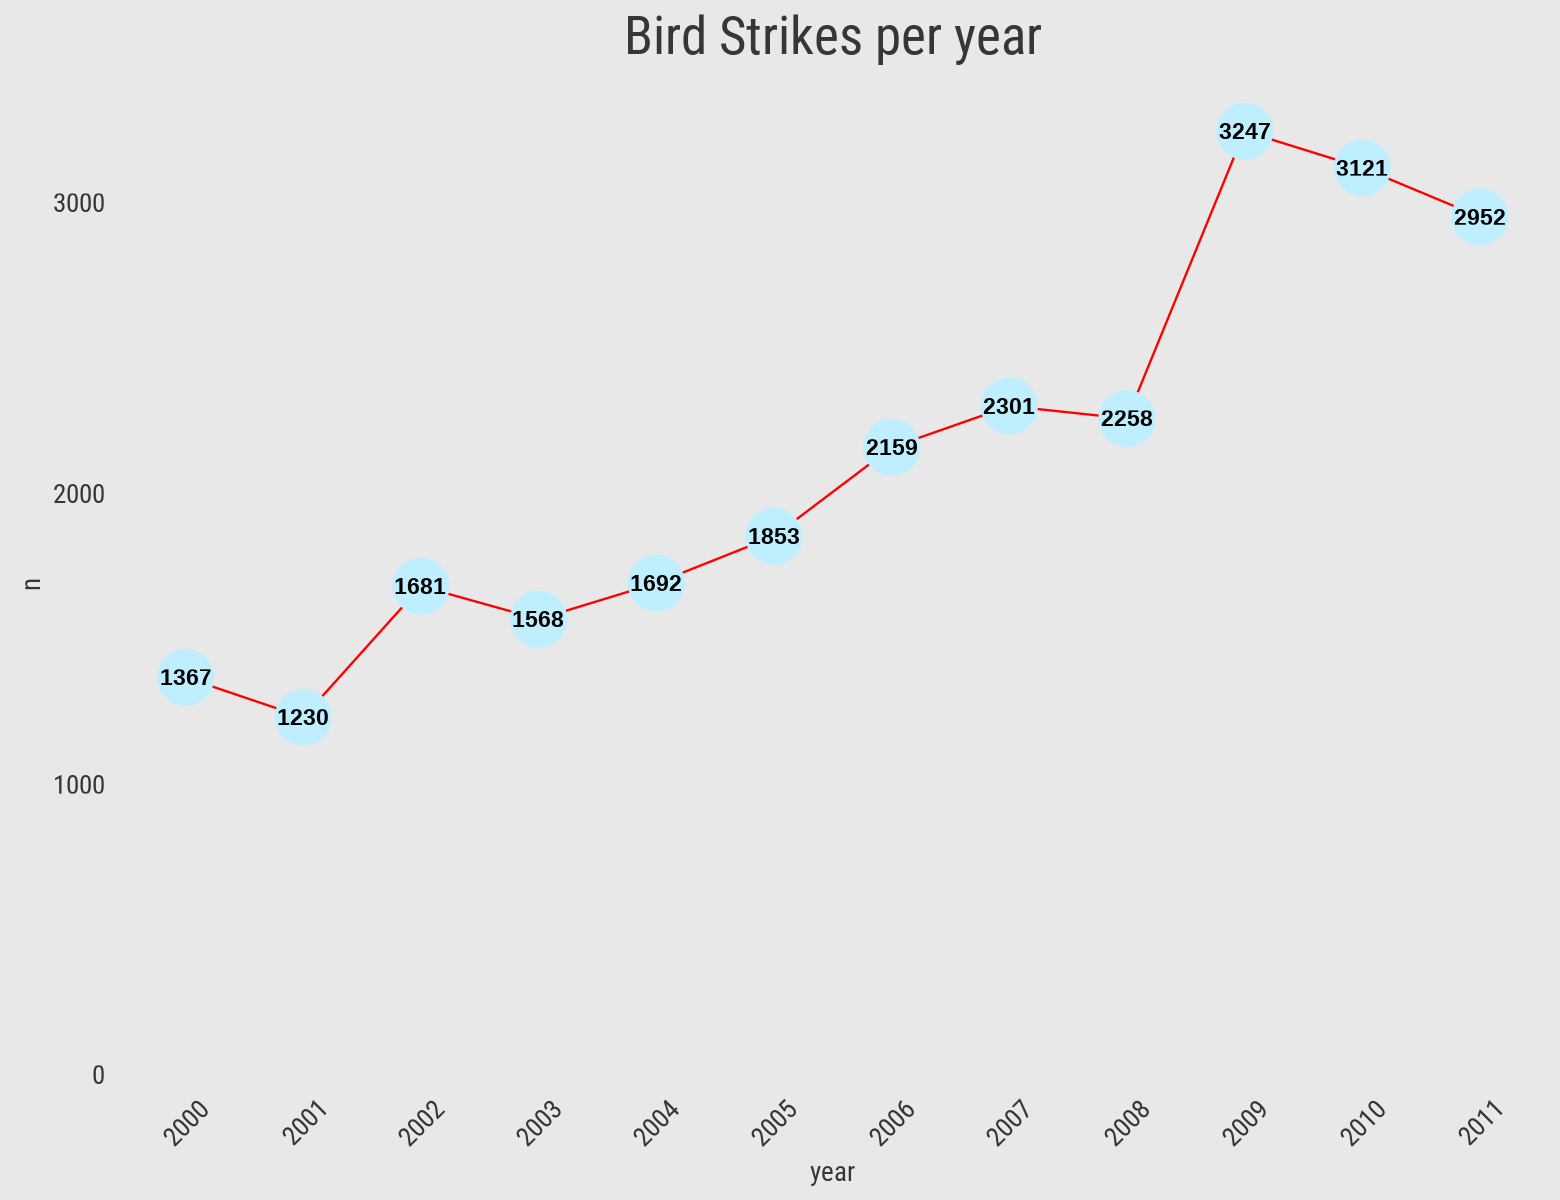

In [35]:
# Line plot for bird strikes per year
df %>%
count(year, sort = TRUE)%>%
ggplot(aes(year, n))+
geom_line(color = "red")+
geom_point(size = 15, color = "#BFEFFF")+
geom_text(aes(label = n), size = 6, vjust = 0.5,hjust = 0.5, color = "black", fontface = "bold")+
scale_x_discrete(limits = c(2000:2011))+
my_theme()+
theme(axis.text.x = element_text(size = 20, face = 'bold', angle = 45,family = 'Roboto'))+
theme(axis.text.y = element_text(size = 20, face = 'bold',family = 'Roboto'))+
theme(plot.title =  element_text(size = 40, face = 'bold',family = 'Roboto'))+
theme(plot.subtitle = element_text(size = 30, face = 'bold',family = 'Roboto'))+
theme(legend.position = "none")+
labs(title = "Bird Strikes per year")

📌 We can see that 2009 has then highest number of bird strike incidents.

# Bird Strike in US

In [36]:
# state map for US
state <- map_data('state')
state <- state %>%
mutate(region = str_to_title(region))%>%
select(region, long, lat, group)
head(state)

,region,long,lat,group
,<chr>,<dbl>,<dbl>,<dbl>
1,Alabama,-87.46201,30.38968,1
2,Alabama,-87.48493,30.37249,1
3,Alabama,-87.52503,30.37249,1
4,Alabama,-87.53076,30.33239,1
5,Alabama,-87.57087,30.32665,1
6,Alabama,-87.58806,30.32665,1


In [37]:
# Count the number of strike in each US state
df1<- df %>%
count(origin_state, sort = TRUE)%>%
  mutate(origin_state = str_to_lower(origin_state))%>%
  rename(region = origin_state)
head(df1)

region,n
<chr>,<int>
california,2520
texas,2453
florida,2055
new york,1319
illinois,1008
pennsylvania,986


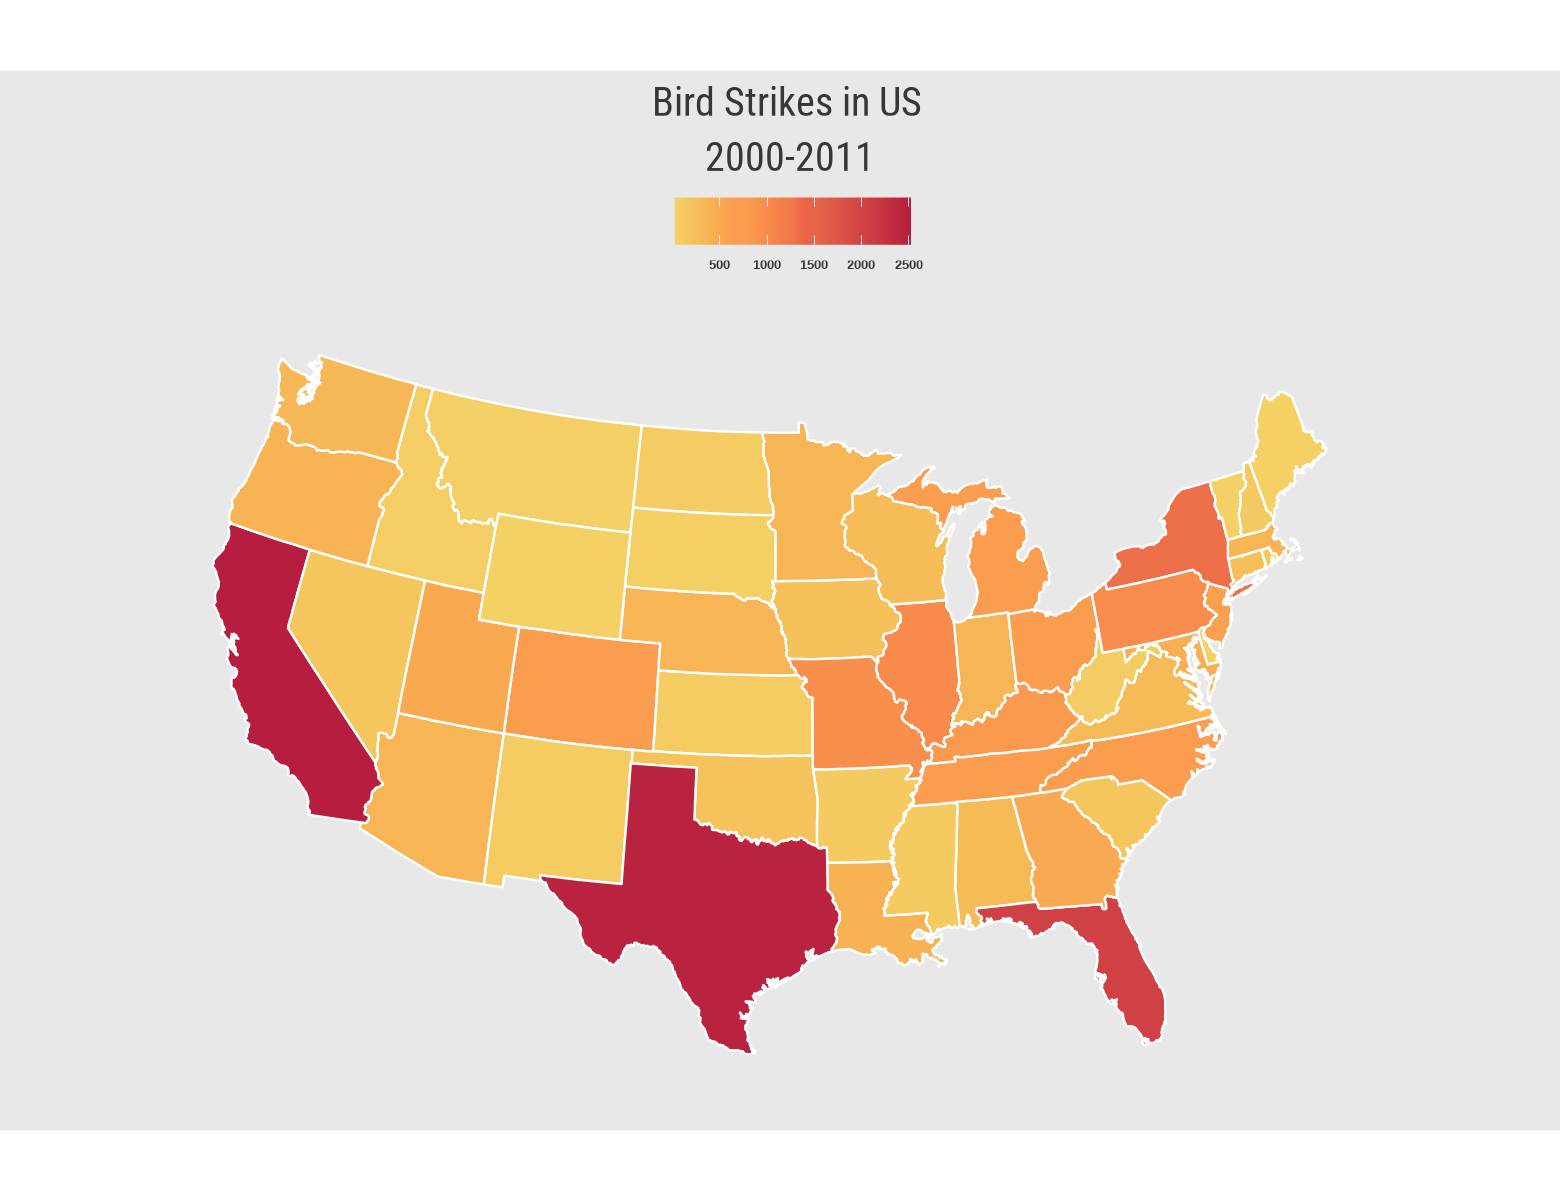

In [38]:
# Join 2 datasets
states_map <- map_data("state")
bird_map <- left_join(states_map, df1, by = "region")

# Create the map
ggplot(bird_map, aes(long, lat, group = group))+
  geom_polygon(aes(fill = n), color = "white")+
  scale_fill_paletteer_c("ggthemes::Red-Gold")+
  my_theme()+
  theme(axis.title.x = element_blank())+
  theme(axis.title.y = element_blank())+
  theme(axis.text.x = element_blank())+
  theme(axis.text.y = element_blank())+
  coord_map("bonne", parameters=45)+
  theme(legend.justification = "center",
        legend.position = "top",
        legend.title=element_blank(),
        legend.margin=margin(b=-10))+
  labs(title = "Bird Strikes in US",
       subtitle = "2000-2011")

📌 California, Texas and Florida has the highest number of bird strike incidents.

## Top 10 Airlines having encountered bird strike

In [39]:
# US airways* and US airways are same name.
df$aircraft_airline_operator <- stringr::str_replace(df$aircraft_airline_operator, '\\*', '')

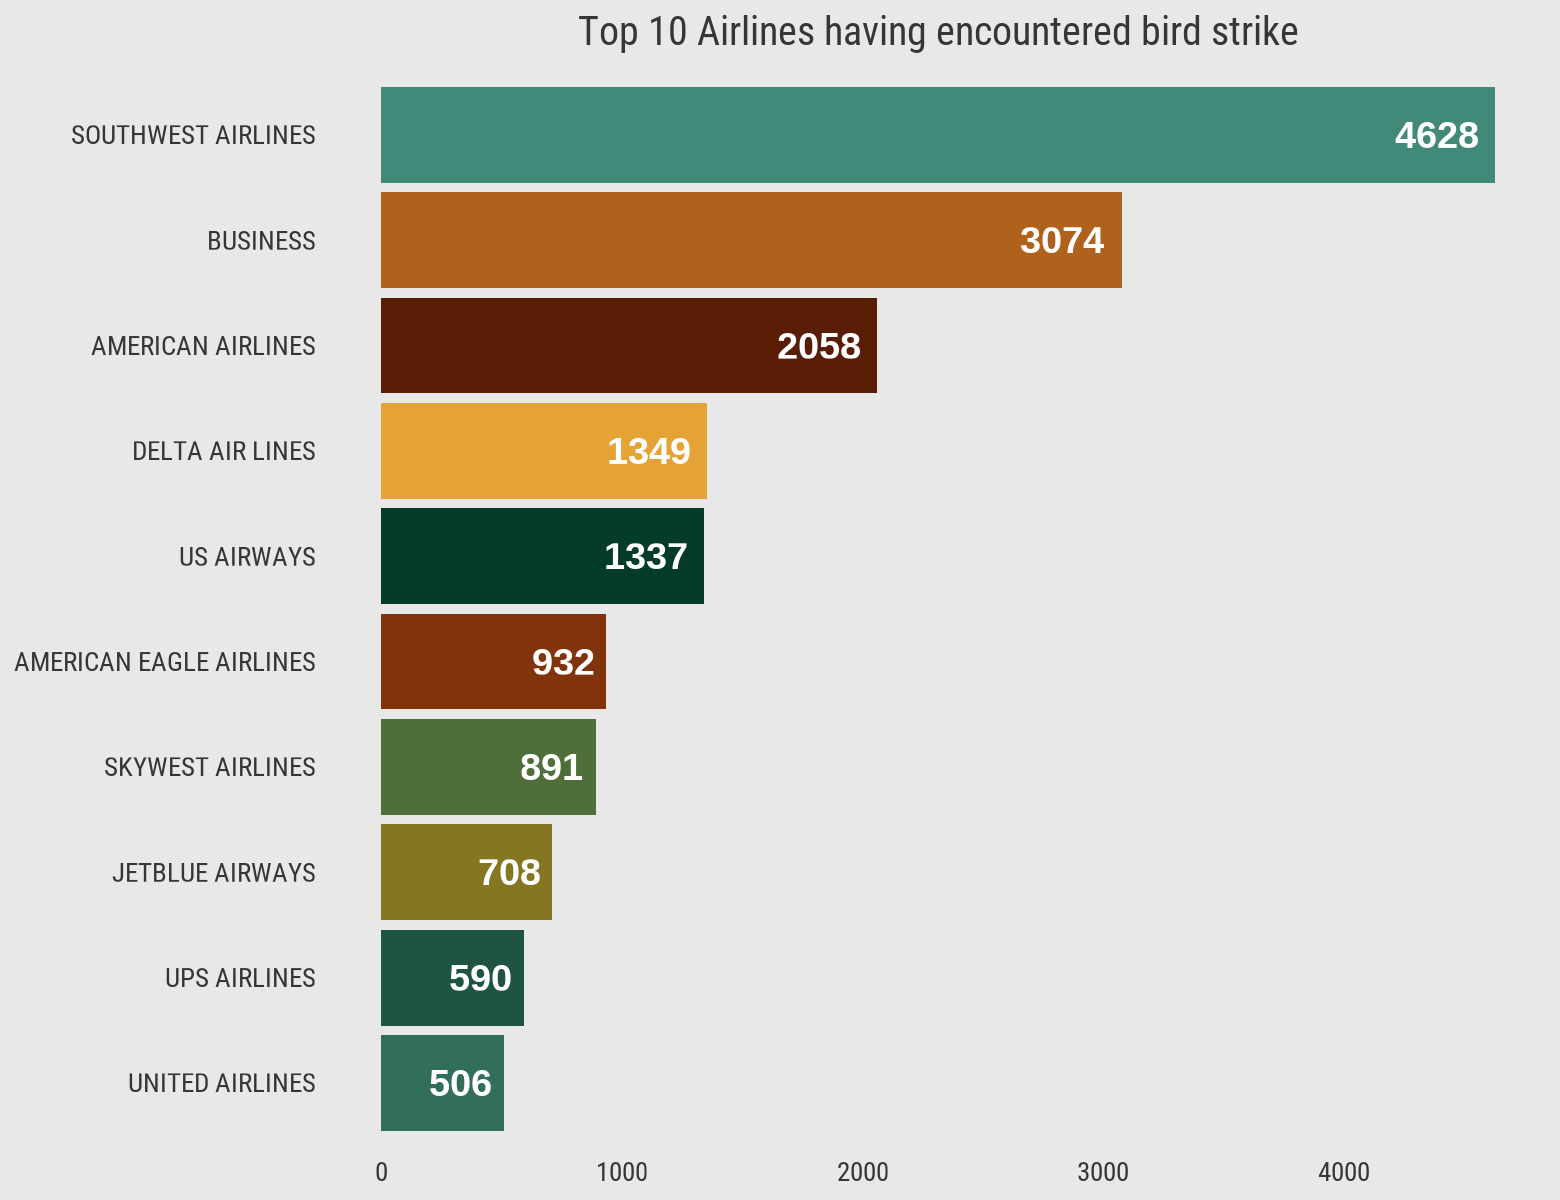

In [40]:
# Barplot for top 10 airlines
df %>%
  count(aircraft_airline_operator, sort = TRUE)%>%
  arrange(desc(n))%>%
  head(10)%>%
  ggplot(aes(reorder(aircraft_airline_operator,n),n, fill = aircraft_airline_operator))+
  geom_col()+
  coord_flip()+
geom_text(aes(label = n), size = 10,hjust = 1.2, color = "white", fontface = "bold")+
scale_fill_manual(values = met.brewer("Degas",10))+
my_theme()+
theme(axis.title.x = element_blank())+
theme(axis.title.y = element_blank())+
theme(legend.position = "none")+
labs(title = "Top 10 Airlines having encountered bird strike")

📌 Southwest Airlines has encountered bird strike incidents most.

## Airports with most incidents of bird strikes

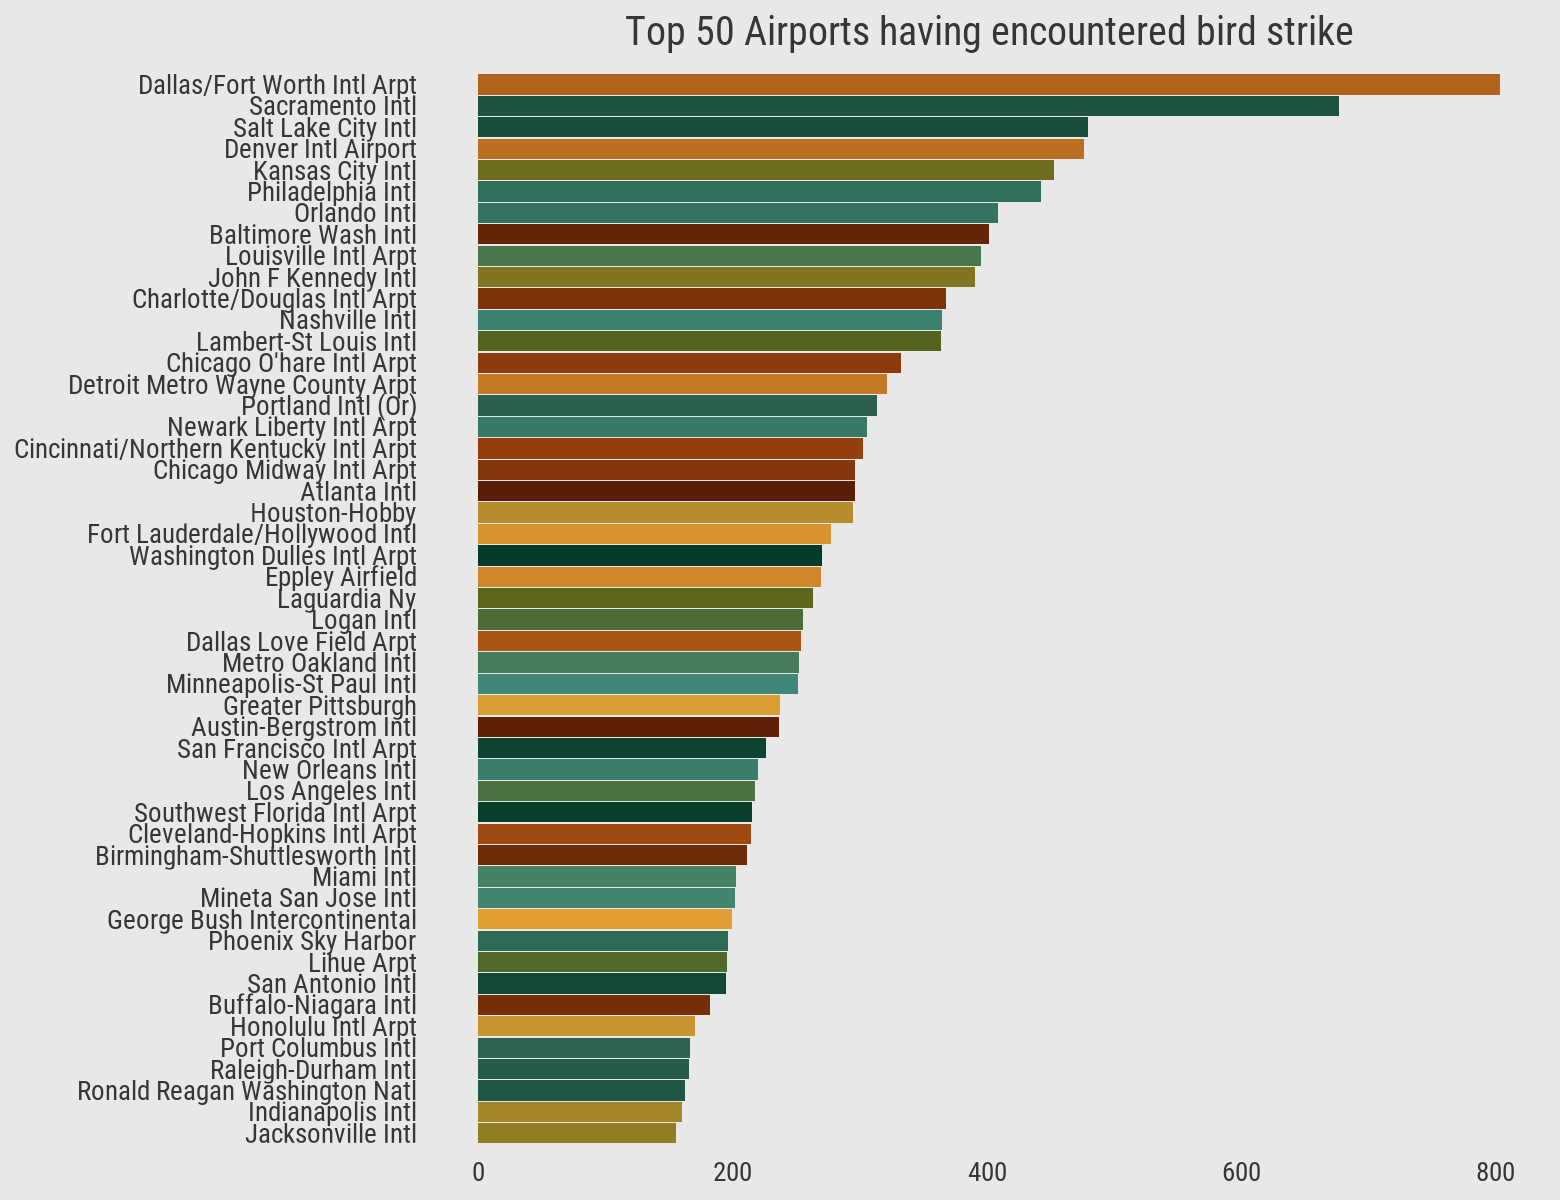

In [41]:
# Barplot for top 50 airlines
df %>%
mutate(airport_name = str_to_title(airport_name))%>%
  count(airport_name, sort = TRUE)%>%
  arrange(desc(n))%>%
  head(50)%>%
  ggplot(aes(reorder(airport_name,n),n, fill = airport_name))+
  geom_col()+
  coord_flip()+
scale_fill_manual(values = met.brewer("Degas",50))+
my_theme()+
theme(axis.title.x = element_blank())+
theme(axis.title.y = element_blank())+
theme(legend.position = "none")+
labs(title = "Top 50 Airports having encountered bird strike")

## Yearly cost incured due to bird strike

Warning message:
“Ignoring unknown aesthetics: nsmall”
Warning message:
“Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_text).”


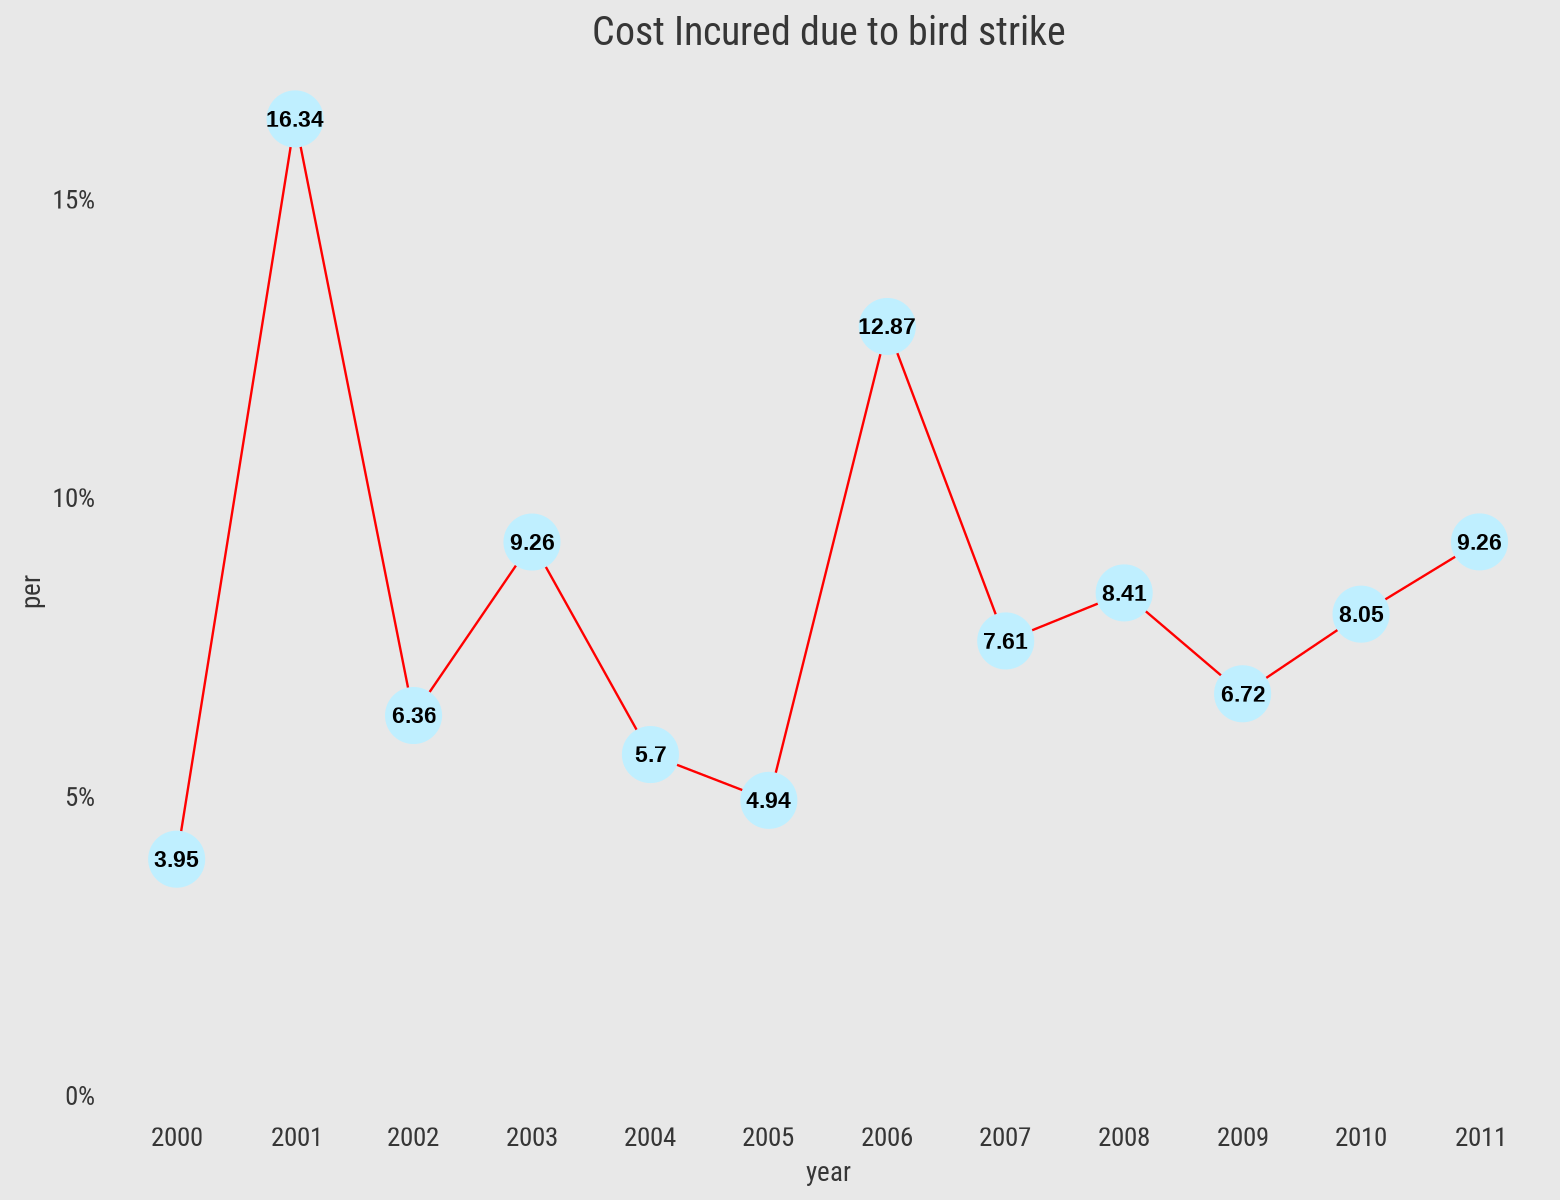

In [42]:
# Lineplot for cost incurred due to strike
df %>%
  group_by(year)%>%
  summarise(total = sum(cost_total))%>%
  mutate(per = (total/sum(total))) %>% 
  ggplot(aes(year, per, fill = per))+
geom_line(color = "red")+
  geom_point(size = 15, color = "#BFEFFF")+
geom_text(aes(label = round((per*100),2),nsmall = 2), size = 6, fontface = "bold")+
scale_x_discrete(limits = c(2000:2011))+
scale_y_continuous(labels = scales::percent)+
my_theme()+
theme(legend.position = "none")+
labs(title = "Cost Incured due to bird strike")

📌 **Cost incurred due to bird stirke is highest in 2001 which is 16.34%**

## When do most bird strikes occur

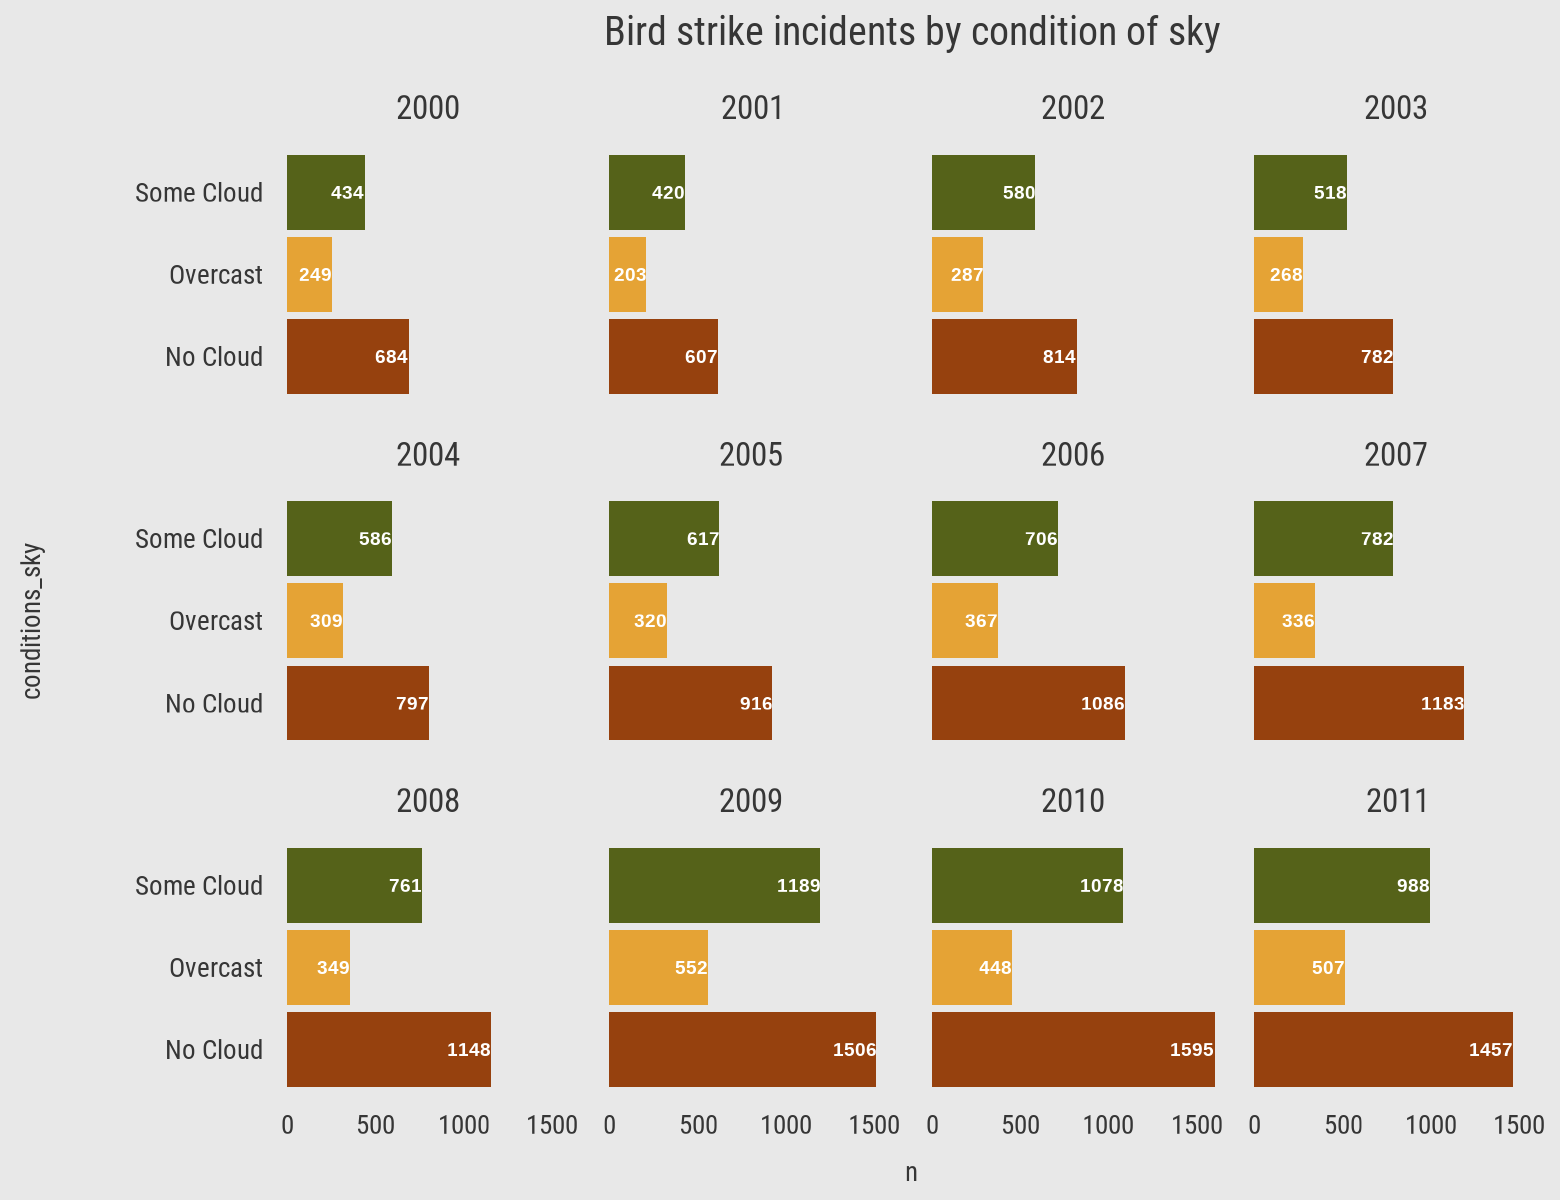

In [43]:
# Facet bar plot for sky condition per year
df %>%
  filter(!is.na(year))%>%
  group_by(year)%>%
  count(conditions_sky, sort = TRUE)%>%
  ggplot(aes(conditions_sky,n, fill = conditions_sky))+
  geom_col()+
geom_text(aes(label = n), size = 5, fontface = "bold", hjust = 1, color = "white")+
  coord_flip()+
  facet_wrap(~year)+
  scale_fill_manual(values = met.brewer("Degas",3))+
  my_theme()+
  theme(legend.position = "none")+
labs(title = "Bird strike incidents by condition of sky")

📌 **Most of the incidents have happened when there is no cloud in each year**

## Altitude of Airplane at the time of bird strike

Warning message:
“Ignoring unknown aesthetics: nsmall”


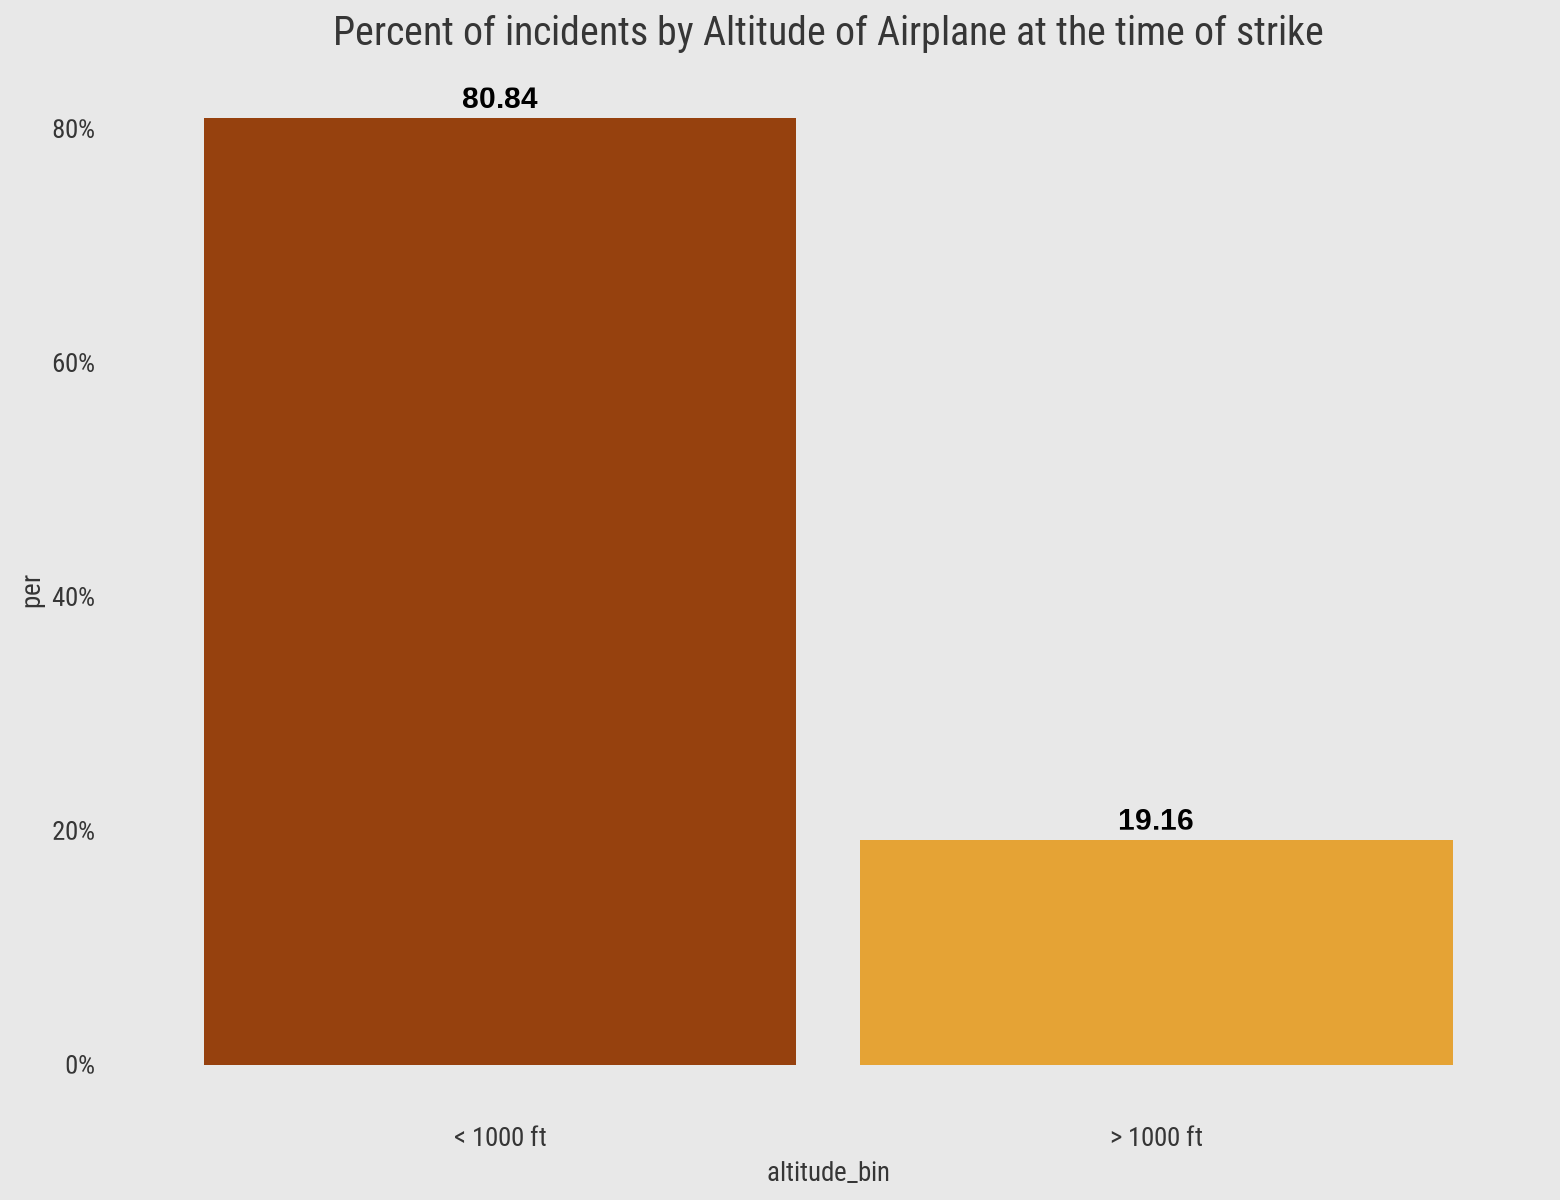

In [44]:
# Barplot for altitude of airplane
df %>%
filter(!is.na(altitude_bin))%>%
count(altitude_bin)%>%
mutate(total = sum(n),
      per = (n/total))%>%
ggplot(aes(altitude_bin, per, fill = altitude_bin))+
geom_col()+
geom_text(aes(label = round((per*100),2),nsmall = 2), size = 8, vjust = -0.5, fontface = "bold")+
scale_y_continuous(labels = scales::percent)+
scale_fill_manual(values = met.brewer("Degas",2))+
my_theme()+
theme(legend.position = "none")+
labs(title = "Percent of incidents by Altitude of Airplane at the time of strike")

📌 **80.84% of bird strike incidents have happened when the altitude of airplane was <1000 ft and 19.16% have happend when altitude was >1000 ft.**


Warning message:
“Ignoring unknown aesthetics: nsmall”


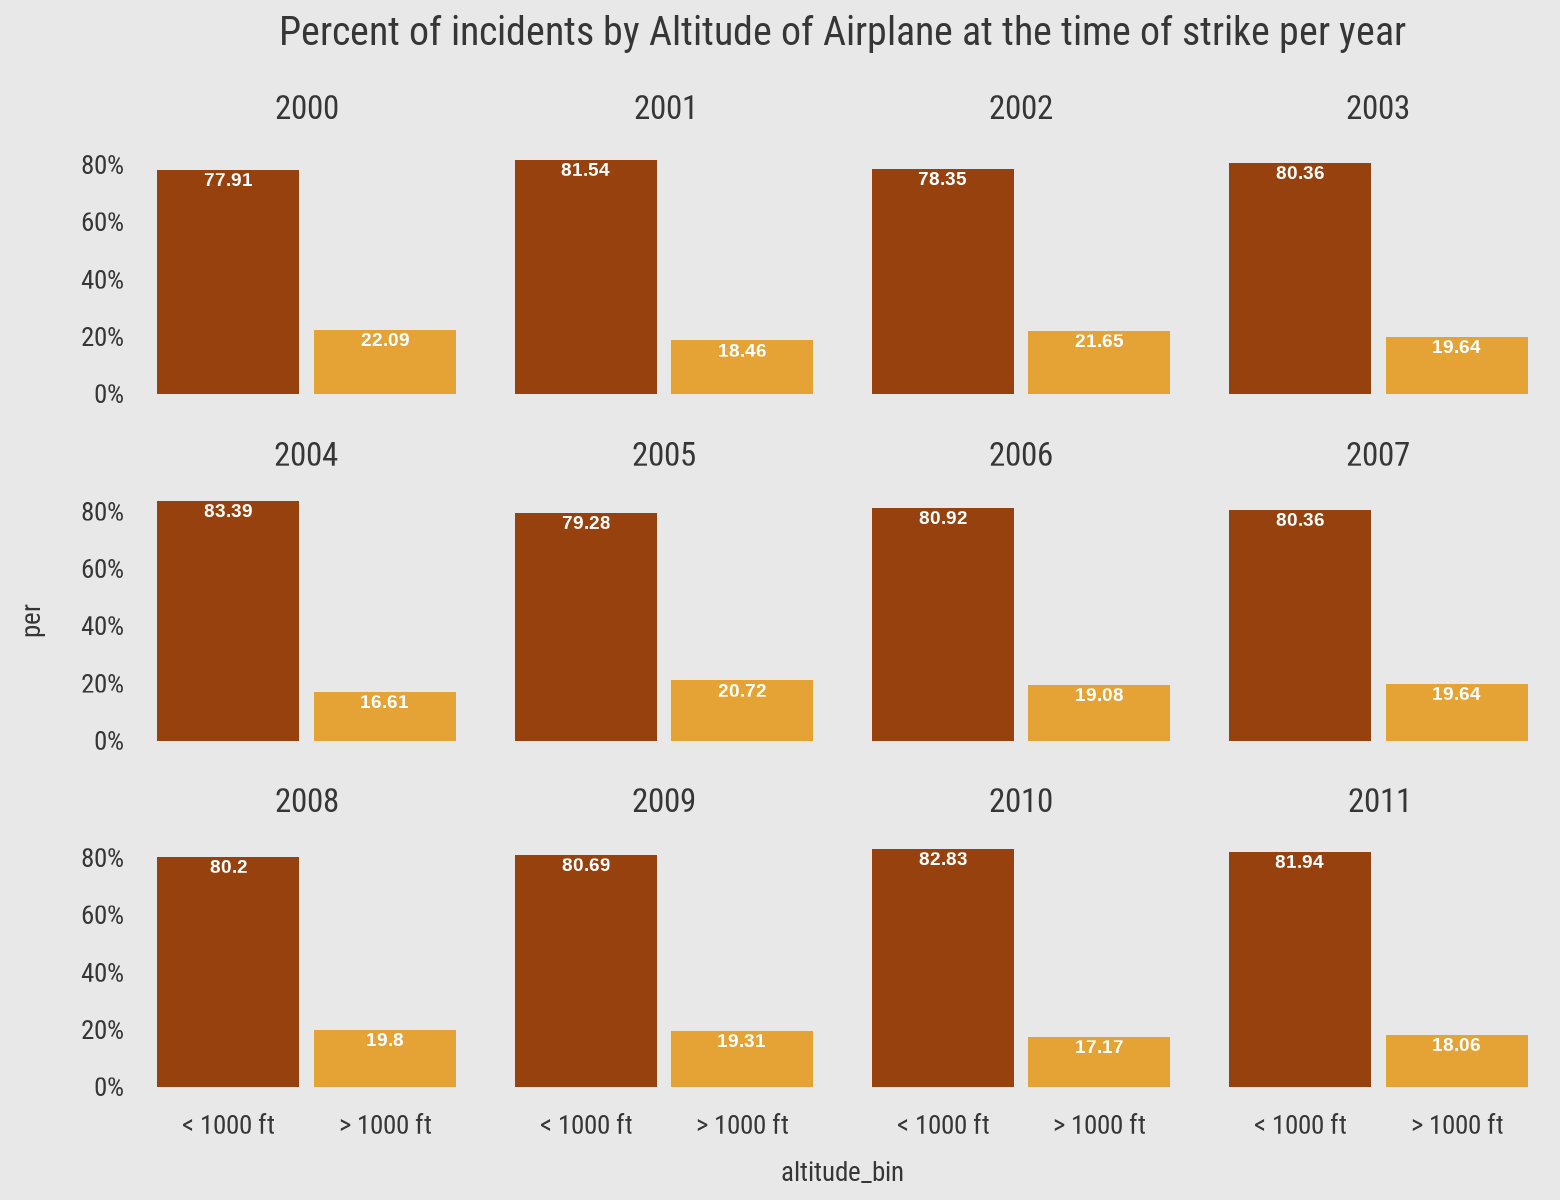

In [45]:
# Facet barplot for altitude bin per 
df %>%
filter(!is.na(altitude_bin))%>%
group_by(year)%>%
count(altitude_bin)%>%
mutate(total = sum(n),
      per = (n/total))%>%
ggplot(aes(altitude_bin, per, fill = altitude_bin))+
geom_col()+
geom_text(aes(label = round((per*100),2),nsmall = 2), size = 5, vjust = 1.2, fontface = "bold", color = "white")+
facet_wrap(~year)+
scale_y_continuous(labels = scales::percent)+
scale_fill_manual(values = met.brewer("Degas",2))+
my_theme()+
theme(legend.position = "none")+
labs(title = "Percent of incidents by Altitude of Airplane at the time of strike per year")

## Phase of flight at the time of strike

Warning message:
“Ignoring unknown aesthetics: digits”


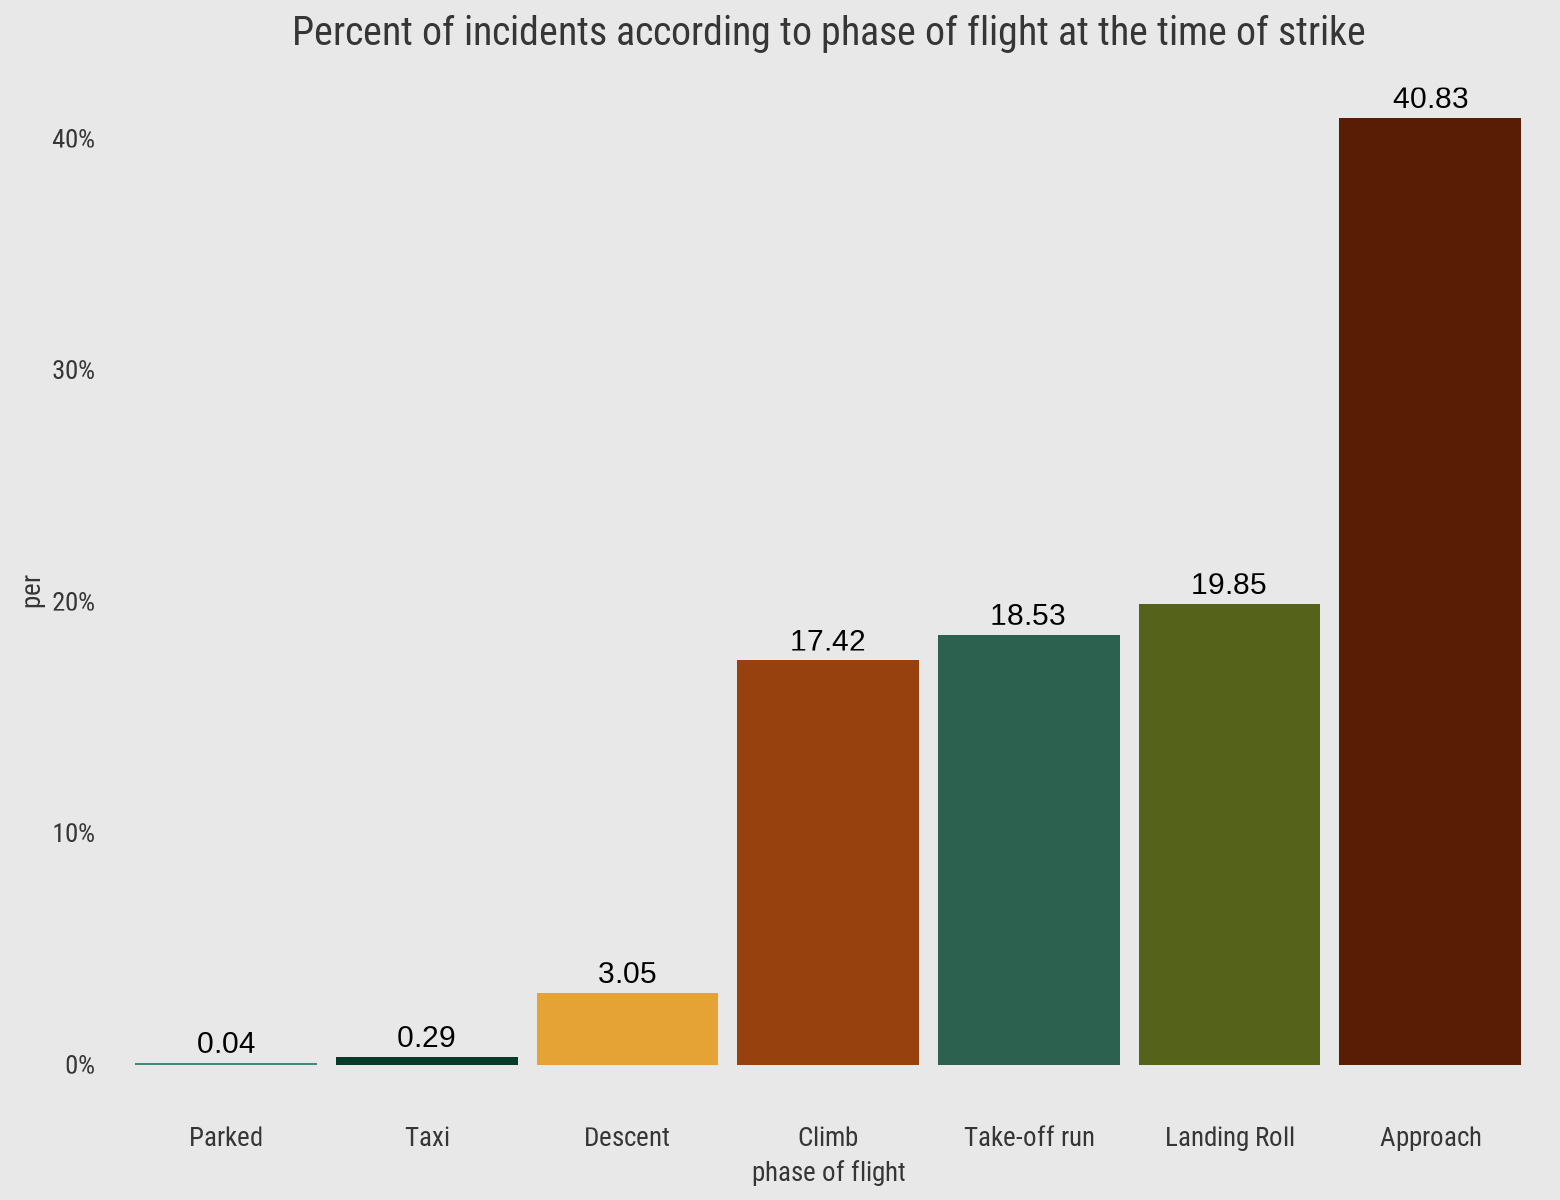

In [46]:
# Barplot for phase of flight
df %>%
filter(!is.na(when_phase_of_flight))%>%
count(when_phase_of_flight, sort = TRUE)%>%
mutate(total = sum(n),
      per = (n/total))%>%
ggplot(aes(reorder(when_phase_of_flight, per),per, fill = when_phase_of_flight))+
geom_col()+
geom_text(aes(label = round((per*100),2),digits = 2), size = 8, vjust = -0.5)+
scale_fill_manual(values = met.brewer("Degas",7))+
scale_y_continuous(labels = scales::percent)+
my_theme()+
theme(legend.position = "none")+
labs(title = "Percent of incidents according to phase of flight at the time of strike",
    x = "phase of flight")

## Average Altitude of airplanes at diffeernet phases of flight

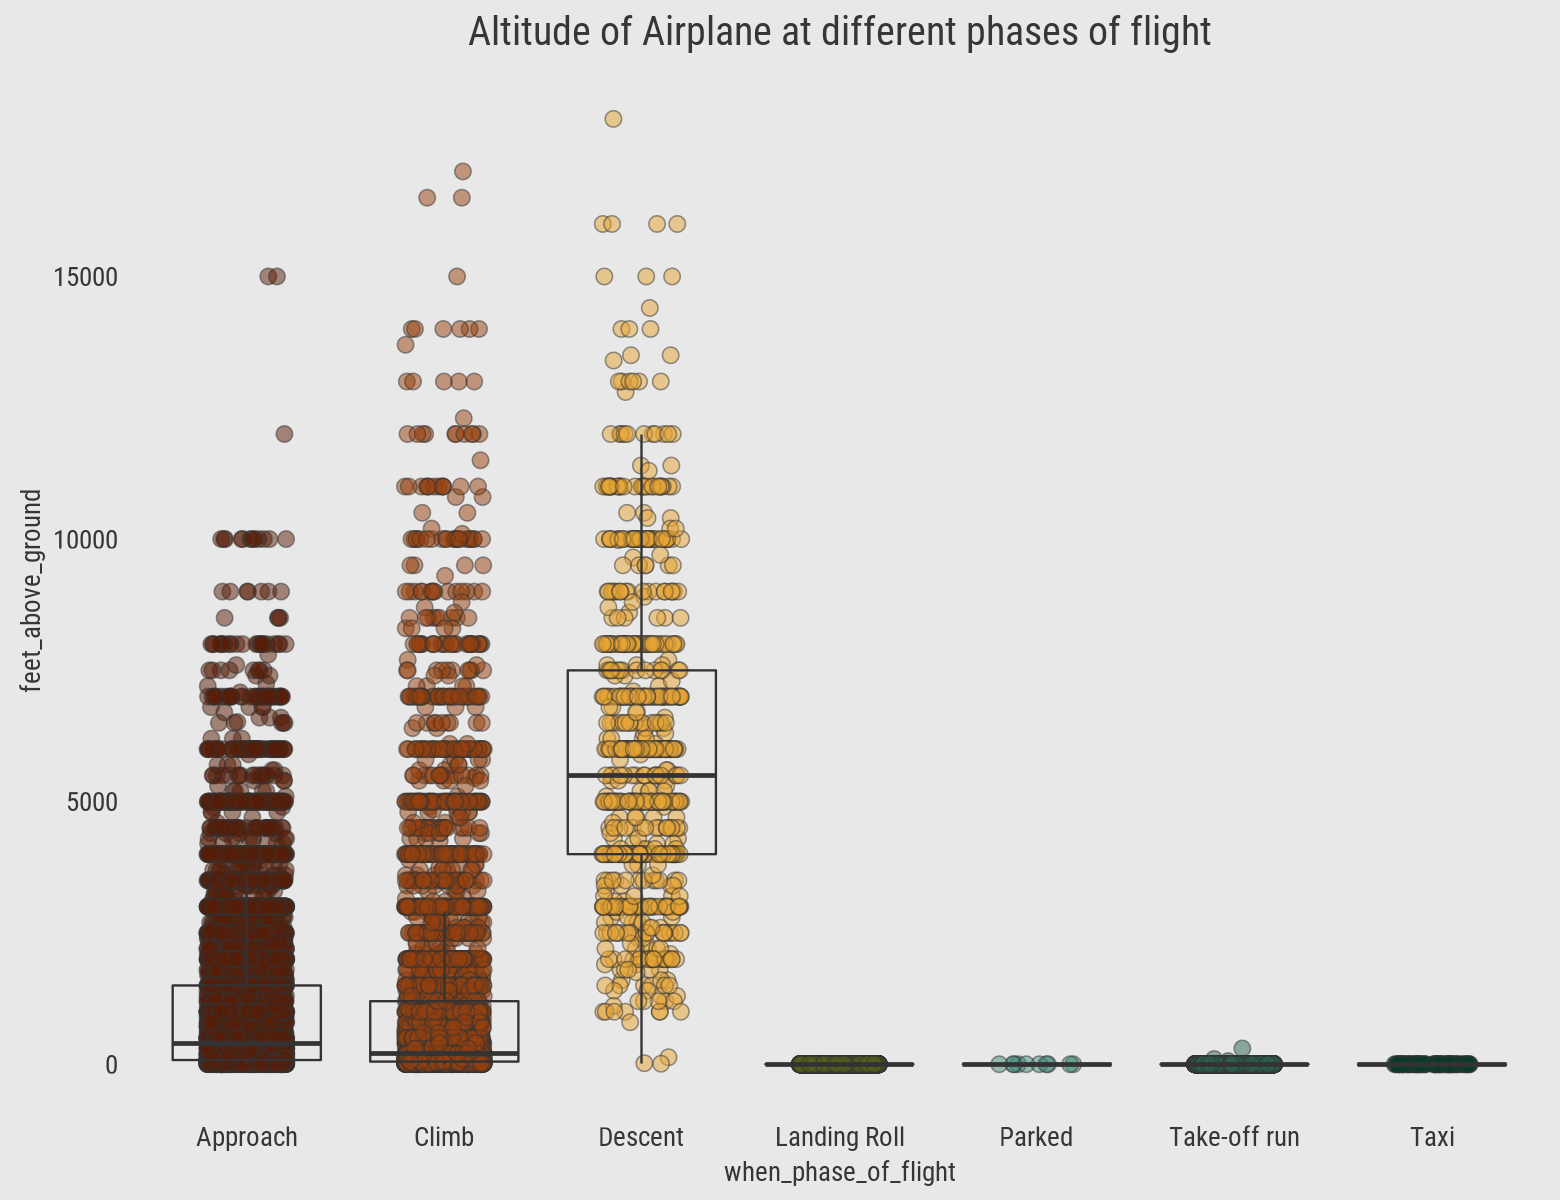

In [47]:
# Boxplot for altitde of plane at different phases of flight
df %>%
filter(!is.na(when_phase_of_flight))%>%
ggplot(aes(x=when_phase_of_flight, y=feet_above_ground)) +
geom_point(aes(fill = when_phase_of_flight), size=4,shape = 21,alpha = 0.5, color="grey20",position=position_jitter(width=0.2, height=0.1)) +
geom_boxplot(outlier.colour=NA, fill=NA, colour="grey20") +
scale_fill_manual(values = met.brewer("Degas",7))+
my_theme()+
theme(legend.position = "none")+
labs(title="Altitude of Airplane at different phases of flight")


## Effect of Bird Strikes

Warning message:
“Ignoring unknown aesthetics: digits”


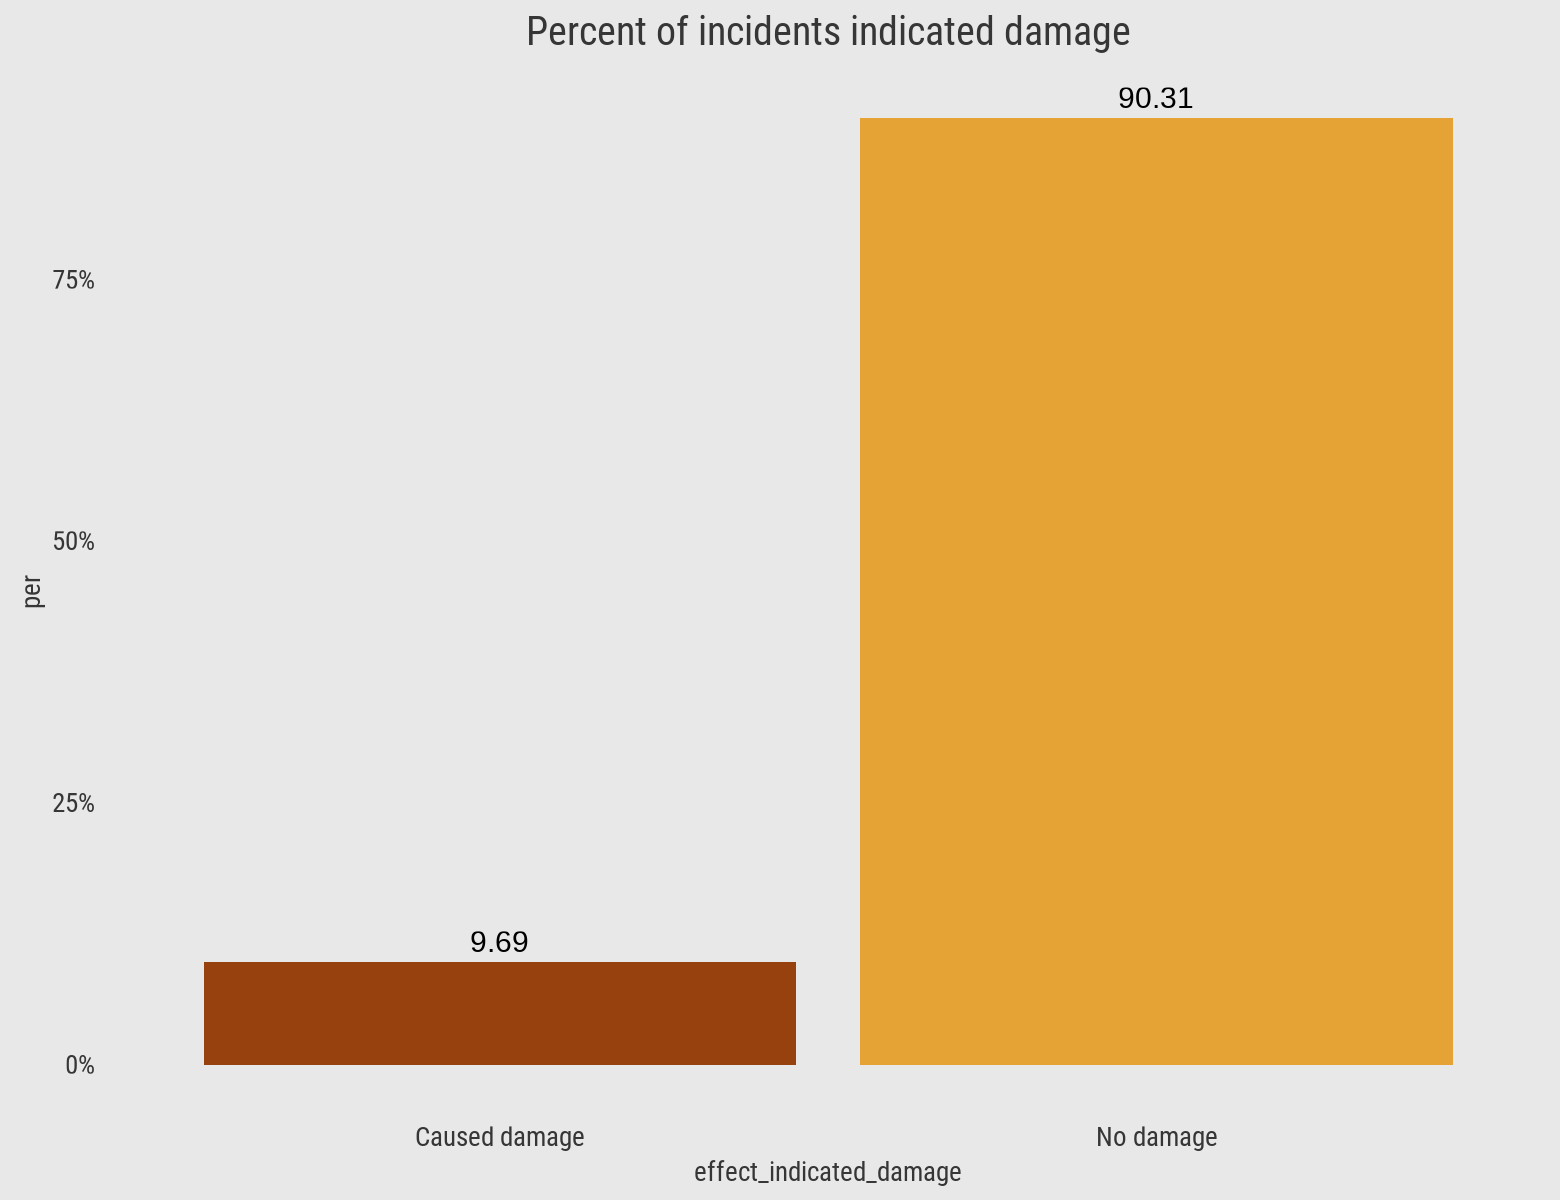

In [48]:
# Barplot for indicated damage effect
df %>%
filter(!is.na(effect_indicated_damage))%>%
count(effect_indicated_damage)%>%
mutate(total = sum(n),
      per = (n/total))%>%
ggplot(aes(effect_indicated_damage, per, fill = effect_indicated_damage))+
geom_col()+
geom_text(aes(label = round((per*100),2),digits = 2), size = 8, vjust = -0.5)+
scale_y_continuous(labels = scales::percent)+
scale_fill_manual(values = met.brewer("Degas",2))+
my_theme()+
theme(legend.position = "none")+
labs(title = "Percent of incidents indicated damage")

📌 **90.31% incidents caused no damage while 9.69% incidents caused damage**

## Impact on Flights

Warning message:
“Ignoring unknown aesthetics: digits”


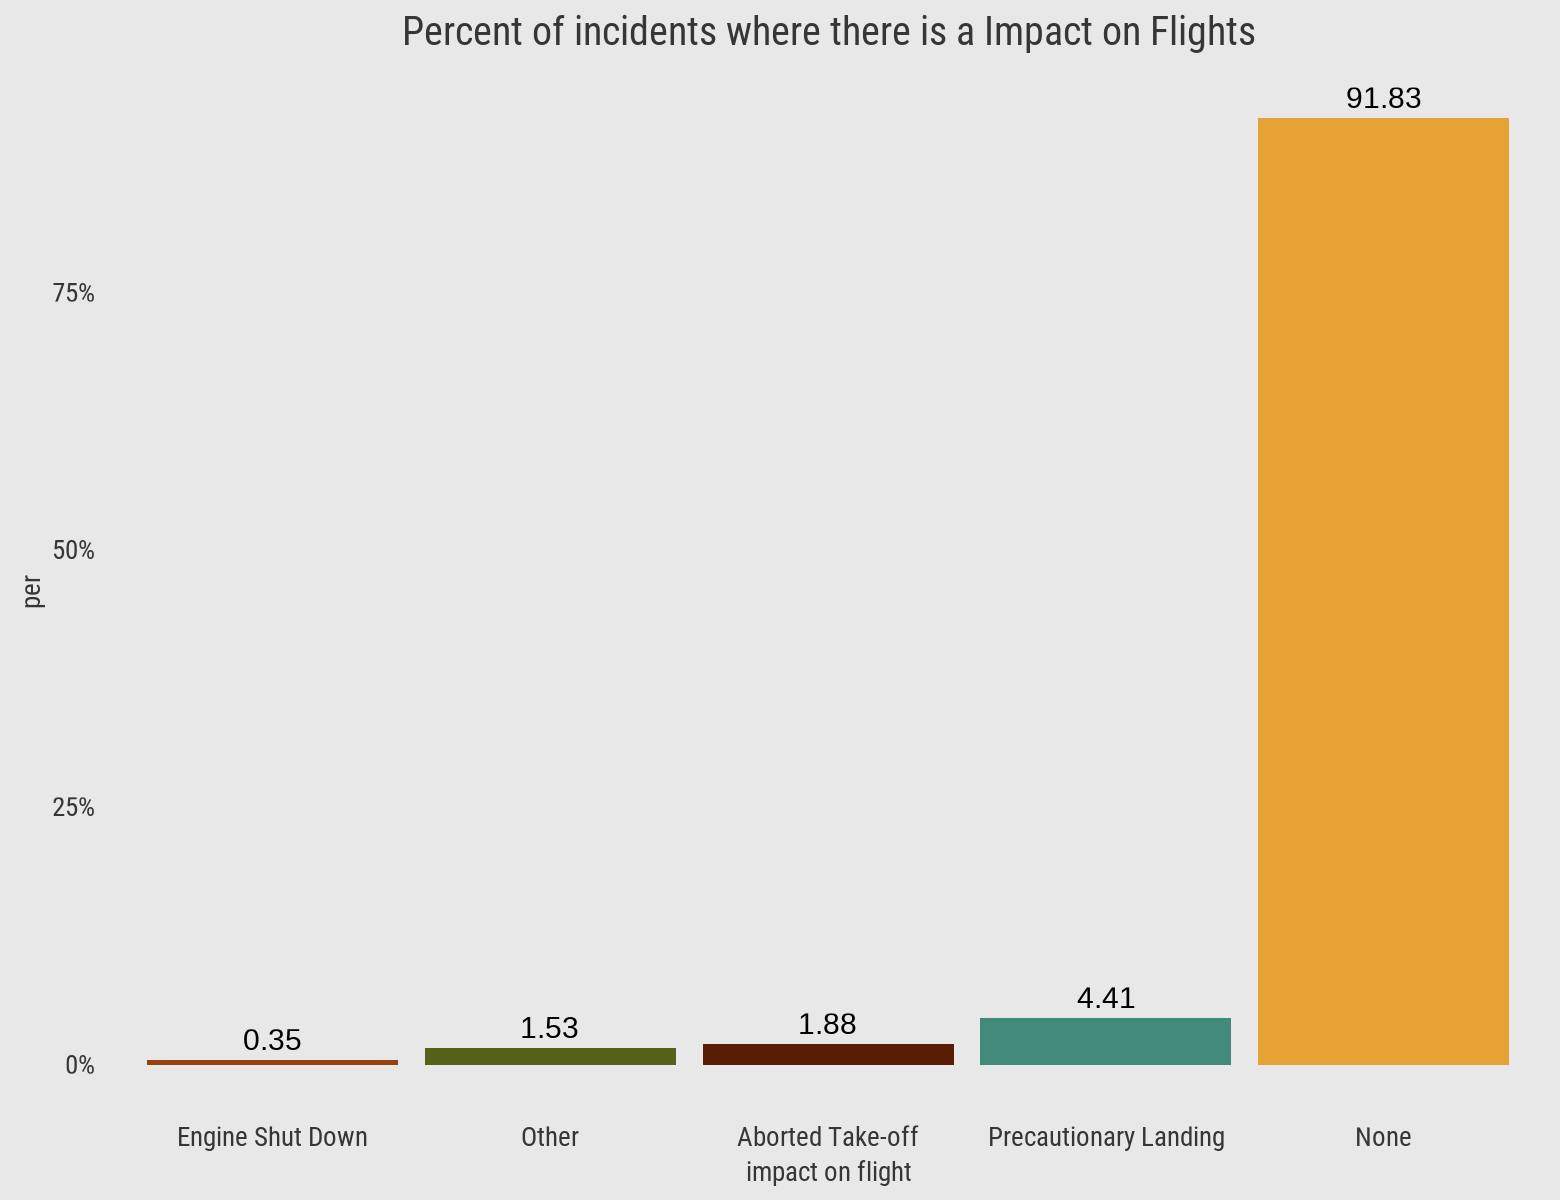

In [49]:
# Barplot for impact on flights
df %>%
filter(!is.na(effect_impact_to_flight))%>%
count(effect_impact_to_flight)%>%
mutate(total = sum(n),
      per = (n/total))%>%
ggplot(aes(reorder(effect_impact_to_flight, per),per, fill = effect_impact_to_flight))+
geom_col()+
geom_text(aes(label = round((per*100),2),digits = 2), size = 8, vjust = -0.5)+
scale_y_continuous(labels = scales::percent)+
scale_fill_manual(values = met.brewer("Degas",5))+
my_theme()+
theme(legend.position = "none")+
labs(title = "Percent of incidents where there is a Impact on Flights",
    x = "impact on flight")

📌 
**- 91.83% incidents where there was no impact on flights**

**- 4.41% incidents where there was precatioanry landing**

**- 1.88% incidents where take off was aborted**

**- 0.35% incidents where engine was shut down**

## Does Pilot warned about birds?

Warning message:
“Ignoring unknown aesthetics: digits”


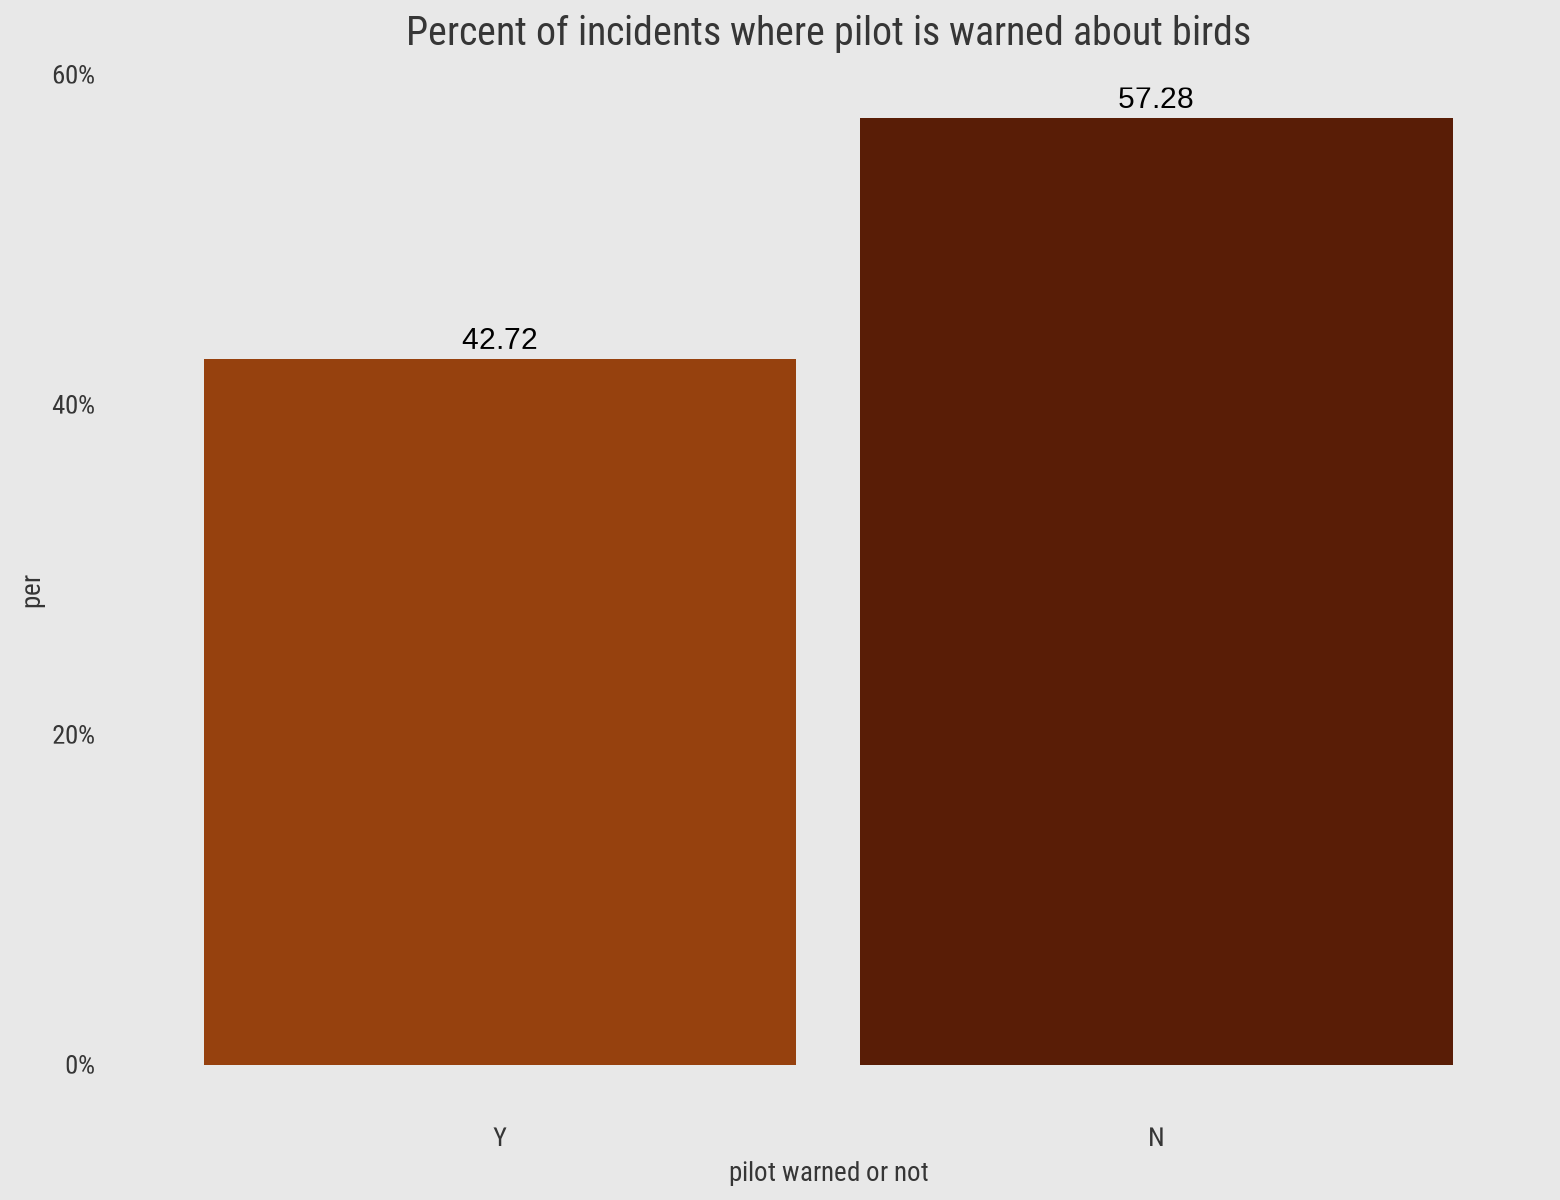

In [50]:
# Barplot for warnign given to pilots 
df %>%
filter(!is.na(pilot_warned_of_birds_or_wildlife))%>%
count(pilot_warned_of_birds_or_wildlife)%>%
mutate(total = sum(n),
      per = (n/total))%>%
ggplot(aes(reorder(pilot_warned_of_birds_or_wildlife, per),per, fill = pilot_warned_of_birds_or_wildlife))+
geom_col()+
geom_text(aes(label = round((per*100),2),digits = 2), size = 8, vjust = -0.5)+
scale_y_continuous(labels = scales::percent)+
scale_fill_manual(values = met.brewer("Degas",5))+
my_theme()+
theme(legend.position = "none")+
labs(title = "Percent of incidents where pilot is warned about birds",
    x = "pilot warned or not")

**📌 42.72% incidents where pilot was warned about the birds**

## Relation between prior warning and effect of strike

Warning message:
“Ignoring unknown aesthetics: digits”


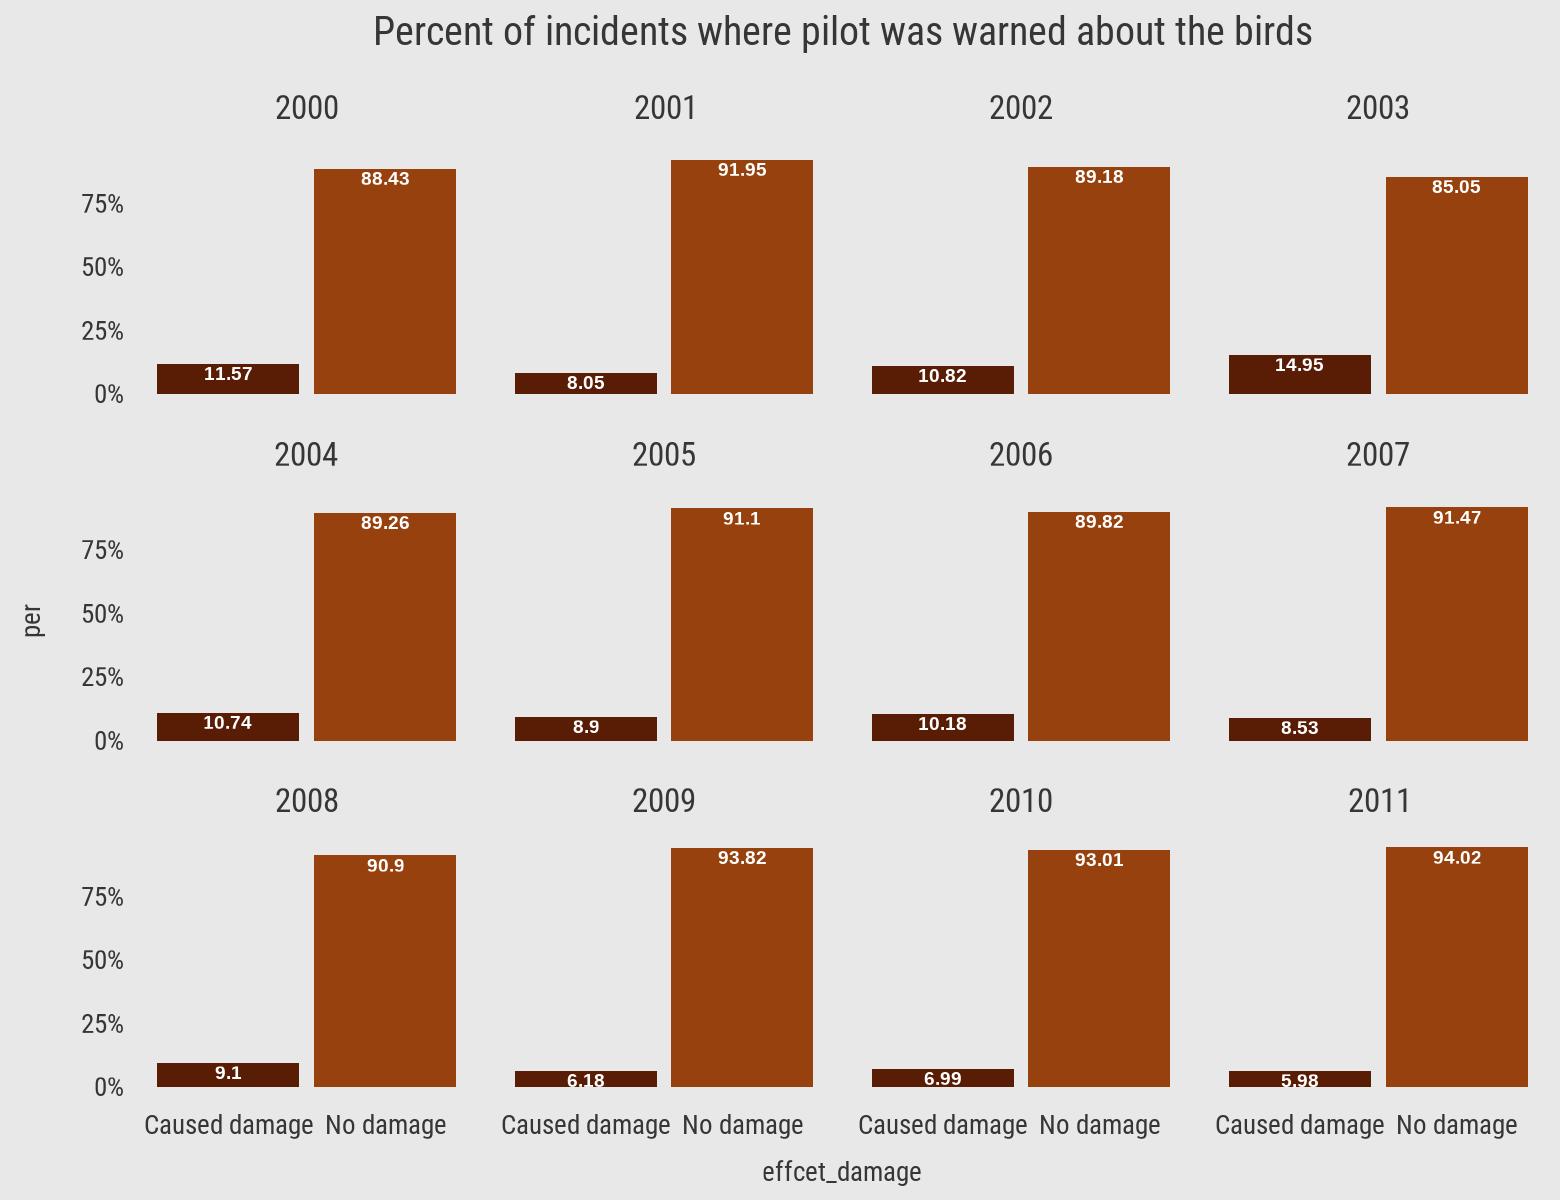

In [51]:
# Barplot for understanding whether the prior warning reduces the damage to the plane
df %>%
filter(pilot_warned_of_birds_or_wildlife == "Y")%>%
group_by(year)%>%
count(effect_indicated_damage, sort = TRUE)%>%
mutate(total = sum(n),
      per = (n/total))%>%
ggplot(aes(reorder(effect_indicated_damage, per),per, fill = effect_indicated_damage))+
geom_col()+
facet_wrap(~year)+
geom_text(aes(label = round((per*100),2),digits = 2), size = 5, vjust = 1.2, fontface = "bold", color = "white")+
scale_y_continuous(labels = scales::percent)+
scale_fill_manual(values = met.brewer("Degas",5))+
my_theme()+
theme(legend.position = "none")+
labs(title = "Percent of incidents where pilot was warned about the birds",
    x = "effcet_damage")

## Wildlife Number Struck

Warning message:
“Ignoring unknown aesthetics: digits”


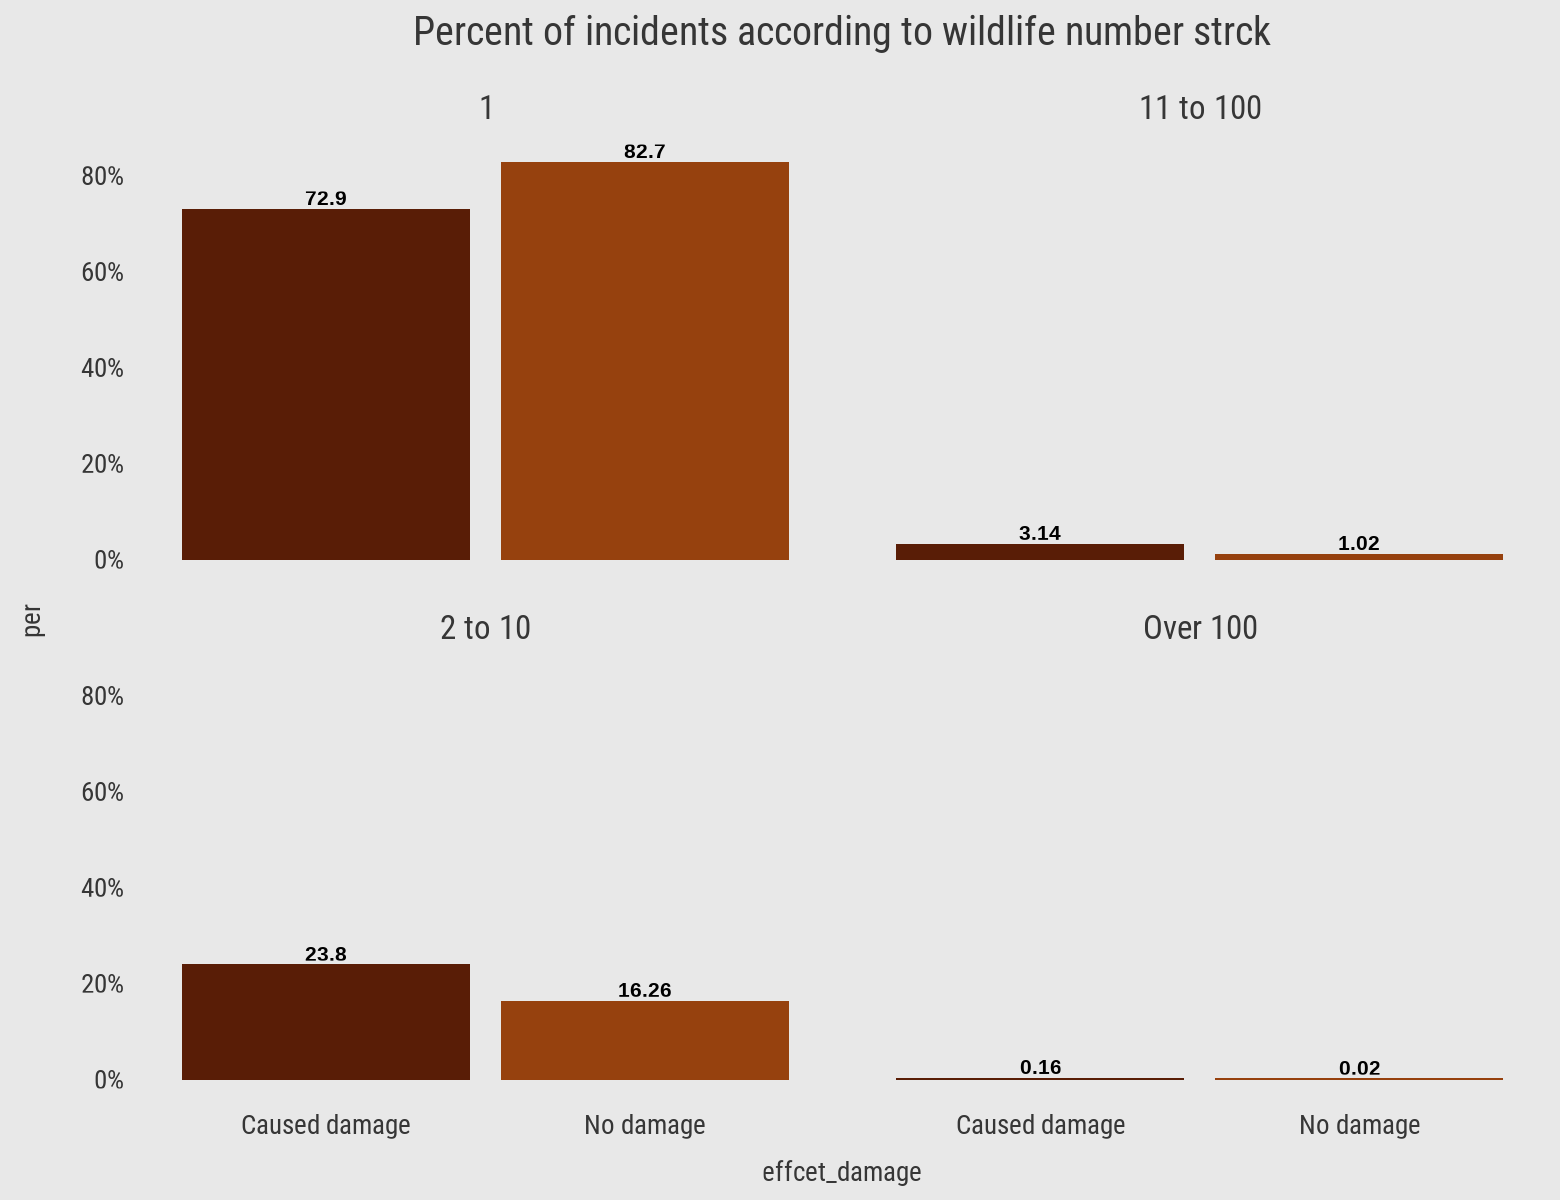

In [52]:
# Barplot for no. of wildlife struck inside plane
df %>%
filter(!is.na(wildlife_number_struck))%>%
group_by(effect_indicated_damage)%>%
count(wildlife_number_struck,sort = TRUE)%>%
mutate(total = sum(n),
      per = (n/total))%>%
ggplot(aes(reorder(effect_indicated_damage, per),per, fill = effect_indicated_damage))+
geom_col()+
facet_wrap(~wildlife_number_struck)+
geom_text(aes(label = round((per*100),2),digits = 2), size = 5.5, vjust = -0.3, fontface = "bold", color = "black")+
scale_y_continuous(labels = scales::percent)+
scale_fill_manual(values = met.brewer("Degas",5))+
my_theme()+
theme(legend.position = "none")+
labs(title = "Percent of incidents according to wildlife number strck",
    x = "effcet_damage")

📌 **72.9% incidents have happend when there is 1 bird/wildlife is struck in the airplane and caused damage.**

## Wildlife Species

Warning message:
“Ignoring unknown aesthetics: digits”


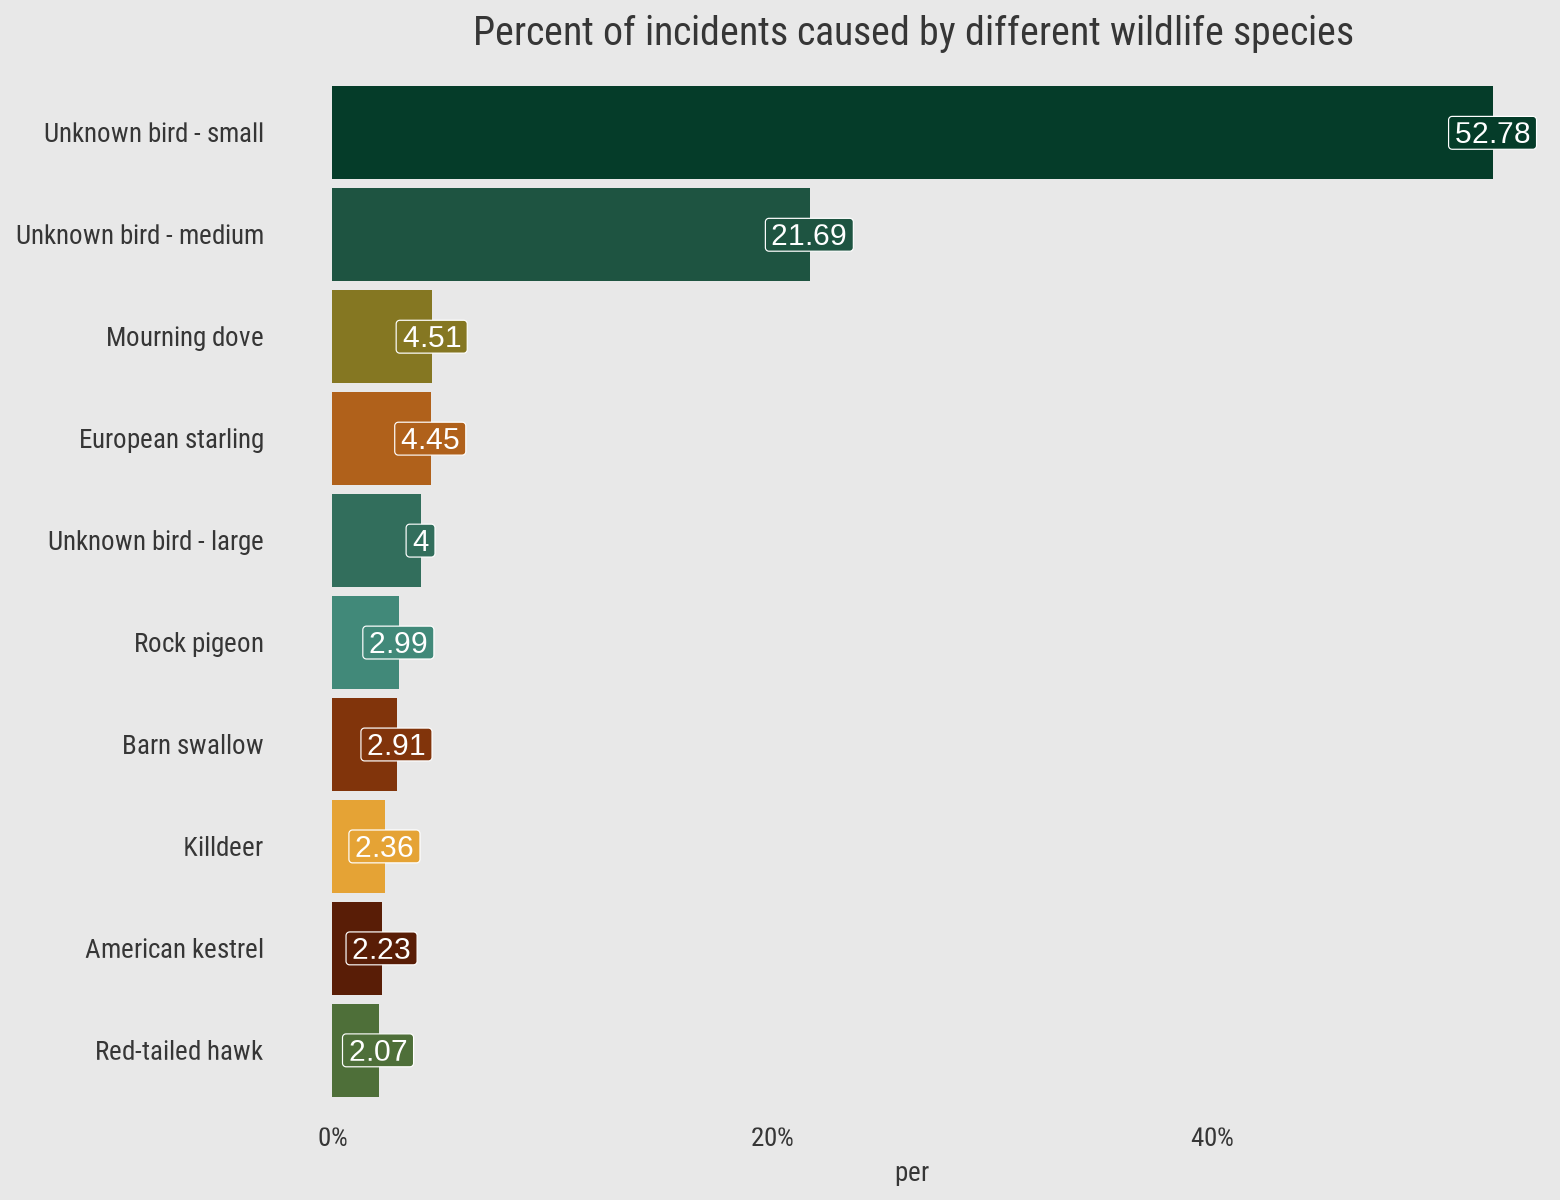

In [53]:
# Barplot for species of wildlife struck
df %>%
filter(!is.na(wildlife_species))%>%
count(wildlife_species)%>%
arrange(desc(n))%>%
head(10)%>%
mutate(total = sum(n),
      per = (n/total))%>%
ggplot(aes(reorder(wildlife_species, per),per, fill = wildlife_species))+
geom_col()+
coord_flip()+
geom_label(aes(label = round((per*100),2),digits = 2), size = 8, color = "white")+
scale_y_continuous(labels = scales::percent)+
scale_fill_manual(values = met.brewer("Degas",10))+
my_theme()+
theme(axis.title.y = element_blank())+
theme(legend.position = "none")+
labs(title = "Percent of incidents caused by different wildlife species")

📌 **52.78% of incidents have happend due to some small unkown bird.**

# Size of the Aircraft

Warning message:
“Ignoring unknown aesthetics: digits”


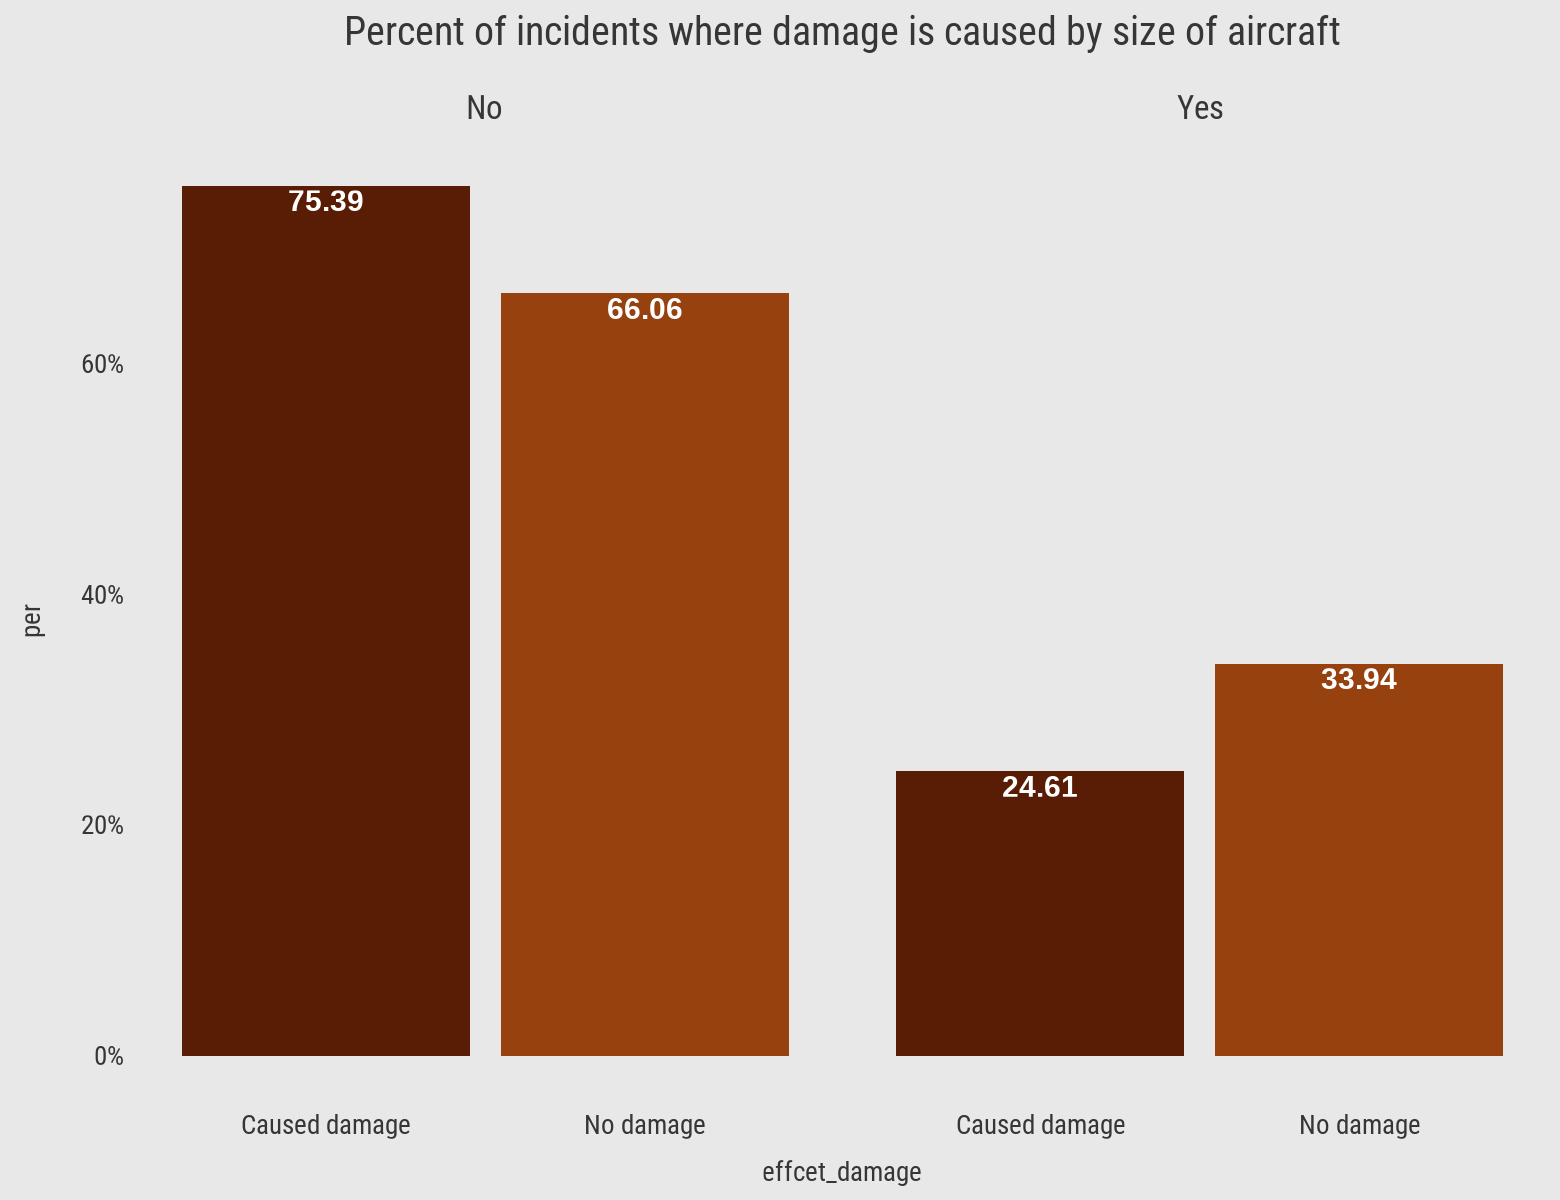

In [54]:
# barplot for size of the aircraft
df %>%
filter(!is.na(is_aircraft_large))%>%
group_by(effect_indicated_damage)%>%
count(is_aircraft_large, sort = TRUE)%>%
mutate(total = sum(n),
      per = (n/total))%>%
ggplot(aes(reorder(effect_indicated_damage, per),per, fill = effect_indicated_damage))+
geom_col()+
facet_wrap(~is_aircraft_large)+
geom_text(aes(label = round((per*100),2),digits = 2), size = 8, vjust = 1.2, fontface = "bold", color = "white")+
scale_y_continuous(labels = scales::percent)+
scale_fill_manual(values = met.brewer("Degas",5))+
my_theme()+
theme(legend.position = "none")+
labs(title = "Percent of incidents where damage is caused by size of aircraft",
    x = "effcet_damage")

📌 **75.39% incidents where damage was caused to aircraft when the size of the aircfet was not large
24.61% incidents where damage was caused to aircraft when size of the aircraft was large**